<a href="https://colab.research.google.com/github/AshbeeKim/AshbeeKim-1/blob/main/Test_on_20210714_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터 플랫폼

-- Data : https://www.kaggle.com/c/titanic

In [ ]:
import os
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

from os.path import join
MY_GOOGLE_DRIVE_PATH = "MyDrive/Task/"

# KAGGLE = ".kaggle"
# KAGGLE_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, KAGGLE)
# os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_PATH
# !pip install --upgrade --force-reinstall --no-deps kaggle
# %cd "{KAGGLE_PATH}"

PROJECT = "Titanic"
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, PROJECT)
# !mkdir "{PROJECT_PATH}"
# print(PROJECT_PATH)


# !kaggle competitions download -c titanic
# !unzip titanic.zip
# !rm titanic.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/.shortcut-targets-by-id/1srYR8TqwFsUSR4BYzQtIBmWUKrEBjd44/Task/Titanic


In [ ]:
import time
import random
import re
import math
import itertools

import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as dp
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv(f"{PROJECT_PATH}/train.csv", encoding="UTF-8")
test = pd.read_csv(f"{PROJECT_PATH}/test.csv", encoding="UTF-8")
submission = pd.read_csv(f"{PROJECT_PATH}/gender_submission.csv", encoding="UTF-8")

In [ ]:
target = train.loc[:, ['PassengerId', 'Survived']]
train = train.drop('Survived', axis=1)

trn_df = train.merge(target, how='left')
tst_df = test.merge(submission, how='left')

## Q1.데이터에 결측치가 있다면, 4가지 이상 방법을 사용한 후 검증하시오.

In [ ]:
trn_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
tst_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

* Age :
  * train ; 177
  * test ; 86
* Fare :
  * test ; 1
* Cabin :
  * train ; 687
  * test ; 327
* Embarked :
  * train ; 2

In [ ]:
print("Train")
print(dp(trn_df.describe(include=float).T))

print("Test")
print(dp(tst_df.describe(include=float).T))

# tst_df.describe(include=[np.float]).T

Train


,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


None
Test


,count,mean,std,min,25%,50%,75%,max
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


None


Distplot of Age


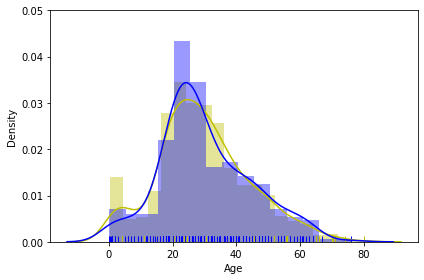

Distplot of Fare


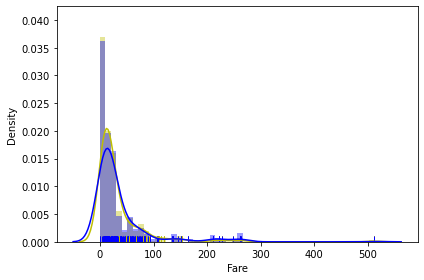

In [ ]:
for col in ['Age', 'Fare']:
  print(f"Distplot of {col}")

  sns.distplot(trn_df[col], color='y', rug=True)
  sns.distplot(tst_df[col], color='b', rug=True)
  plt.tight_layout()
  plt.show()

In [ ]:
print("Train")
print(dp(trn_df.describe(include=object).T))

print("Test")
print(dp(tst_df.describe(include=object).T))

# tst_df.describe(include=[np.float]).T

Train


,count,unique,top,freq
Name,891,891,"Moubarek, Master. Halim Gonios (""William George"")",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


None
Test


,count,unique,top,freq
Name,418,418,"Hee, Mr. Ling",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


None


Countplot of Cabin


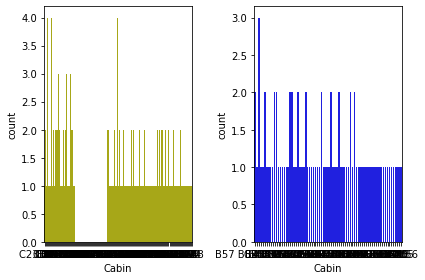

Countplot of Embarked


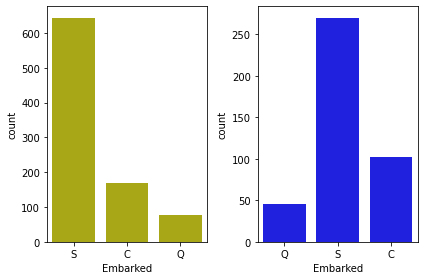

In [ ]:
for col in ['Cabin', 'Embarked']:
  print(f"Countplot of {col}")
  f, ax = plt.subplots(ncols=2)
  sns.countplot(trn_df[col], color='y', ax=ax[0])
  sns.countplot(tst_df[col], color='b', ax=ax[1])
  plt.tight_layout()
  plt.show()

### ~~hypothesis 1. Is that okay to fill missing values(Age) as quantile(0.75), and change type from float to int(refleting reality)~~

In [ ]:
hyp1_trn = trn_df.copy()
hyp1_tst = tst_df.copy()
# trn_age_q75 = hyp1_trn['Age'].quantile(0.75)
# hyp1_trn['Age'] = hyp1_trn['Age'].fillna(trn_age_q75)
# hyp1_trn['Age'] = hyp1_trn['Age'].astype('int')

# tst_age_q75 = hyp1_tst['Age'].quantile(0.75)
# hyp1_tst['Age'] = hyp1_tst['Age'].fillna(tst_age_q75)
# hyp1_tst['Age'] = hyp1_tst['Age'].astype('int')

# sns.distplot(hyp1_trn['Age'], color='y', rug=True)
# sns.distplot(hyp1_tst['Age'], color='b', rug=True)
# plt.tight_layout()
# plt.show()

쌍곡 분포의 형태가 나오기 때문에, quantile(0.75) 사용 불가

### hypothesis 2. Then, what if I fill missing values in Age unsing median?

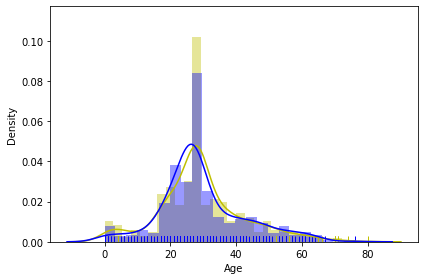

In [ ]:
hyp2_trn = trn_df.copy()
hyp2_tst = tst_df.copy()
trn_age_median = hyp2_trn['Age'].median()
hyp2_trn['Age'] = hyp2_trn['Age'].fillna(trn_age_median)
hyp2_trn['Age'] = hyp2_trn['Age'].astype('int')

tst_age_median = hyp2_tst['Age'].median()
hyp2_tst['Age'] = hyp2_tst['Age'].fillna(tst_age_median)
hyp2_tst['Age'] = hyp2_tst['Age'].astype('int')

sns.distplot(hyp2_trn['Age'], color='y', rug=True)
sns.distplot(hyp2_tst['Age'], color='b', rug=True)
plt.tight_layout()
plt.show()

엄청 예쁘진 않지만, 그래도 정규분포의 형태를 띄고 있기에 사용가능하다고 판단

### hypothesis 3. I want to fill the Fare's missing value as 'zero', but it's impossible when I concern reality. So just fill this using mean of Fare(test) and reflect reality round(2).

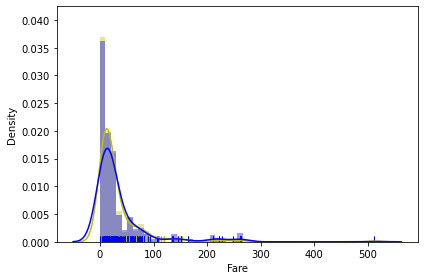

In [ ]:
hyp2_trn['Fare'] = hyp2_trn['Fare'].round(2)

hyp2_tst['Fare'] = hyp2_tst['Fare'].fillna(hyp2_tst['Fare'].mean())
hyp2_tst['Fare'] = hyp2_tst['Fare'].round(2)

sns.distplot(hyp2_trn['Fare'], color='y', rug=True)
sns.distplot(hyp2_tst['Fare'], color='b', rug=True)
plt.tight_layout()
plt.show()

결측치를 채우고, round(2)를 하기 전과 크게 달라지지 않은 정규분포의 형태라 사용하기로 함

### hypothesis 4. Using mode, fill missing values in Embarked(just two in train)



In [ ]:
hyp2_trn['Embarked'] = hyp2_trn['Embarked'].fillna(hyp2_trn['Embarked'].mode())

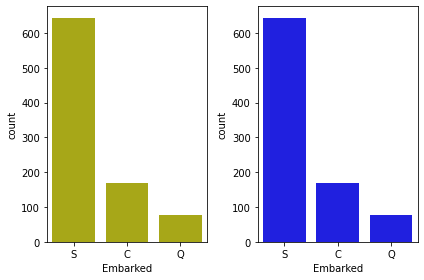

In [ ]:
f, ax = plt.subplots(ncols=2)
sns.countplot(trn_df['Embarked'], color='y', ax=ax[0])
sns.countplot(trn_df['Embarked'], color='b', ax=ax[1])
plt.tight_layout()
plt.show()

어차피 S, C, Q중에는 S가 압도적으로 많기 때문에 mode로 채워도 문제가 되지 않음

### Unique?

In [ ]:
check = [cabin[:1] for cabin in hyp1_trn['Cabin'] if type(cabin)!=float]
check_unq = pd.Series(check).unique()

check2 = [cabin[:1] for cabin in hyp1_tst['Cabin'] if type(cabin)!=float]
check2_unq = pd.Series(check2).unique()

In [ ]:
print(f"Total Counts of unique in Train : {len(check)}")
for unq in check_unq:
  if unq in check:
    print(f"\tCounts of unq_{unq} : {len([chk for chk in check if chk==unq])}")

print(f"Total Counts of unique in Test : {len(check2)}")
for unq in check2_unq:
  if unq in check2:
    print(f"\tCounts of unq_{unq} : {len([chk for chk in check2 if chk==unq])}")

Total Counts of unique in Train : 204
	Counts of unq_C : 59
	Counts of unq_E : 32
	Counts of unq_G : 4
	Counts of unq_D : 33
	Counts of unq_A : 15
	Counts of unq_B : 47
	Counts of unq_F : 13
	Counts of unq_T : 1
Total Counts of unique in Test : 91
	Counts of unq_B : 18
	Counts of unq_E : 9
	Counts of unq_A : 7
	Counts of unq_C : 35
	Counts of unq_D : 13
	Counts of unq_F : 8
	Counts of unq_G : 1


In [ ]:
print(f"Total Counts of unique in Train : {len(check)}")
for unq in check_unq:
  if unq in check:
    print(f"\tPercentage of unq_{unq} : {round((len([chk for chk in check if chk==unq])/len(check))*100, 2)}")

print(f"Total Counts of unique in Test : {len(check2)}")
for unq in check2_unq:
  if unq in check2:
    print(f"\tPercentage of unq_{unq} : {round((len([chk for chk in check2 if chk==unq])/len(check2))*100, 2)}")

Total Counts of unique in Train : 204
	Percentage of unq_C : 28.92
	Percentage of unq_E : 15.69
	Percentage of unq_G : 1.96
	Percentage of unq_D : 16.18
	Percentage of unq_A : 7.35
	Percentage of unq_B : 23.04
	Percentage of unq_F : 6.37
	Percentage of unq_T : 0.49
Total Counts of unique in Test : 91
	Percentage of unq_B : 19.78
	Percentage of unq_E : 9.89
	Percentage of unq_A : 7.69
	Percentage of unq_C : 38.46
	Percentage of unq_D : 14.29
	Percentage of unq_F : 8.79
	Percentage of unq_G : 1.1


In [ ]:
trn_A_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='A')]
trn_B_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='B')]
trn_C_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='C')]
trn_D_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='D')]
trn_E_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='E')]
trn_F_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='F')]
trn_G_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='G')]
trn_T_idx = [idx for idx, cabin in enumerate(hyp1_trn['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='T')]

In [ ]:
trn_cabin = ["A", "B", "C", "D", "E", "F", "G", "T"]

for cabin in trn_cabin:
  print(cabin)
  print(dp(hyp1_trn.loc[eval(f"trn_{cabin}_idx"), ['Pclass', 'Cabin', 'Name']]))

A


,Pclass,Cabin,Name
23,1,A6,"Sloper, Mr. William Thompson"
96,1,A5,"Goldschmidt, Mr. George B"
174,1,A7,"Smith, Mr. James Clinch"
185,1,A32,"Rood, Mr. Hugh Roscoe"
209,1,A31,"Blank, Mr. Henry"
284,1,A19,"Smith, Mr. Richard William"
445,1,A34,"Dodge, Master. Washington"
475,1,A14,"Clifford, Mr. George Quincy"
556,1,A16,"Duff Gordon, Lady. (Lucille Christiana Sutherl..."
583,1,A10,"Ross, Mr. John Hugo"


None
B


,Pclass,Cabin,Name
31,1,B78,"Spencer, Mrs. William Augustus (Marie Eugenie)"
54,1,B30,"Ostby, Mr. Engelhart Cornelius"
61,1,B28,"Icard, Miss. Amelie"
118,1,B58 B60,"Baxter, Mr. Quigg Edmond"
139,1,B86,"Giglio, Mr. Victor"
170,1,B19,"Van der hoef, Mr. Wyckoff"
194,1,B4,"Brown, Mrs. James Joseph (Margaret Tobin)"
195,1,B80,"Lurette, Miss. Elise"
257,1,B77,"Cherry, Miss. Gladys"
263,1,B94,"Harrison, Mr. William"


None
C


,Pclass,Cabin,Name
1,1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
11,1,C103,"Bonnell, Miss. Elizabeth"
27,1,C23 C25 C27,"Fortune, Mr. Charles Alexander"
55,1,C52,"Woolner, Mr. Hugh"
62,1,C83,"Harris, Mr. Henry Birkhardt"
88,1,C23 C25 C27,"Fortune, Miss. Mabel Helen"
110,1,C110,"Porter, Mr. Walter Chamberlain"
137,1,C123,"Futrelle, Mr. Jacques Heath"
151,1,C2,"Pears, Mrs. Thomas (Edith Wearne)"


None
D


,Pclass,Cabin,Name
21,2,D56,"Beesley, Mr. Lawrence"
52,1,D33,"Harper, Mrs. Henry Sleeper (Myna Haxtun)"
97,1,D10 D12,"Greenfield, Mr. William Bertram"
102,1,D26,"White, Mr. Richard Frasar"
124,1,D26,"White, Mr. Percival Wayland"
136,1,D47,"Newsom, Miss. Helen Monypeny"
215,1,D36,"Newell, Miss. Madeleine"
218,1,D15,"Bazzani, Miss. Albina"
248,1,D35,"Beckwith, Mr. Richard Leonard"
275,1,D7,"Andrews, Miss. Kornelia Theodosia"


None
E


,Pclass,Cabin,Name
6,1,E46,"McCarthy, Mr. Timothy J"
92,1,E31,"Chaffee, Mr. Herbert Fuller"
123,2,E101,"Webber, Miss. Susan"
166,1,E33,"Chibnall, Mrs. (Edith Martha Bowerman)"
262,1,E67,"Taussig, Mr. Emil"
303,2,E101,"Keane, Miss. Nora A"
309,1,E36,"Francatelli, Miss. Laura Mabel"
319,1,E34,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
337,1,E40,"Burns, Miss. Elizabeth Margaret"
356,1,E33,"Bowerman, Miss. Elsie Edith"


None
F


,Pclass,Cabin,Name
66,2,F33,"Nye, Mrs. (Elizabeth Ramell)"
75,3,F G73,"Moen, Mr. Sigurd Hansen"
128,3,F E69,"Peter, Miss. Anna"
148,2,F2,"Navratil, Mr. Michel (""Louis M Hoffman"")"
183,2,F4,"Becker, Master. Richard F"
193,2,F2,"Navratil, Master. Michel M"
340,2,F2,"Navratil, Master. Edmond Roger"
345,2,F33,"Brown, Miss. Amelia ""Mildred"""
516,2,F33,"Lemore, Mrs. (Amelia Milley)"
618,2,F4,"Becker, Miss. Marion Louise"


None
G


,Pclass,Cabin,Name
10,3,G6,"Sandstrom, Miss. Marguerite Rut"
205,3,G6,"Strom, Miss. Telma Matilda"
251,3,G6,"Strom, Mrs. Wilhelm (Elna Matilda Persson)"
394,3,G6,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt..."


None
T


,Pclass,Cabin,Name
339,1,T,"Blackwell, Mr. Stephen Weart"


None


In [ ]:
tst_A_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='A')]
tst_B_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='B')]
tst_C_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='C')]
tst_D_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='D')]
tst_E_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='E')]
tst_F_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='F')]
tst_G_idx = [idx for idx, cabin in enumerate(hyp1_tst['Cabin']) if (type(cabin)!=float) and (cabin[:1]=='G')]

In [ ]:
tst_cabin = ["A", "B", "C", "D", "E", "F", "G"]

for cabin in tst_cabin:
  print(cabin)
  print(dp(hyp1_tst.loc[eval(f"tst_{cabin}_idx"), ['Pclass', 'Cabin', 'Name']]))

A


,Pclass,Cabin,Name
28,1,A21,"Brady, Mr. John Bertram"
46,1,A9,"Chevre, Mr. Paul Romaine"
112,1,A29,"Evans, Miss. Edith Corse"
208,1,A11,"Rosenbaum, Miss. Edith Louise"
293,1,A34,"Dodge, Dr. Washington"
331,1,A18,"Dulles, Mr. William Crothers"
374,1,A34,"Dodge, Mrs. Washington (Ruth Vidaver)"


None
B


,Pclass,Cabin,Name
12,1,B45,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)"
24,1,B57 B59 B63 B66,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)"
26,1,B36,"Ostby, Miss. Helene Ragnhild"
59,1,B61,"Chaudanson, Miss. Victorine"
64,1,B57 B59 B63 B66,"Ryerson, Master. John Borie"
92,1,B71,"Davidson, Mrs. Thornton (Orian Hays)"
142,1,B57 B59 B63 B66,"Ryerson, Mr. Arthur Larned"
166,1,B10,"Brandeis, Mr. Emil"
184,1,B58 B60,"Douglas, Mrs. Frederick Charles (Mary Helene B..."
215,1,B11,"Head, Mr. Christopher"


None
C


,Pclass,Cabin,Name
34,1,C78,"Mock, Mr. Philipp Edmund"
50,1,C31,"Smith, Mr. Lucien Philip"
53,1,C23 C25 C27,"Fortune, Miss. Ethel Flora"
68,1,C53,"Tucker, Mr. Gilbert Milligan Jr"
69,1,C23 C25 C27,"Fortune, Mrs. Mark (Mary McDougald)"
74,1,C130,"Geiger, Miss. Amalie"
75,1,C132,"Keeping, Mr. Edwin"
77,1,C101,"Cornell, Mrs. Robert Clifford (Malvina Helen L..."
81,1,C55 C57,"Straus, Mr. Isidor"
96,1,C46,"Cavendish, Mrs. Tyrell William (Julia Florence..."


None
D


,Pclass,Cabin,Name
41,1,D34,"Franklin, Mr. Thomas Parham"
44,1,D19,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)"
48,1,D15,"Bucknell, Mrs. William Robert (Emma Eliza Ward)"
73,1,D43,"Ovies y Rodriguez, Mr. Servando"
158,1,D22,"Borebank, Mr. John James"
182,1,D30,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic..."
236,1,D37,"Warren, Mr. Frank Manley"
245,1,D21,"Kenyon, Mr. Frederick R"
301,2,D,"Malachard, Mr. Noel"
350,1,D10 D12,"Greenfield, Mrs. Leo David (Blanche Strouse)"


None
E


,Pclass,Cabin,Name
14,1,E31,"Chaffee, Mrs. Herbert Fuller (Carrie Constance..."
146,1,E46,"Hilliard, Mr. Herbert Henry"
179,1,E45,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing..."
181,1,E52,"Compton, Mr. Alexander Taylor Jr"
196,1,E34,"Spedden, Master. Robert Douglas"
242,1,E34,"Spedden, Mr. Frederic Oakley"
355,1,E60,"Julian, Mr. Henry Forbes"
364,1,E50,"Harder, Mrs. George Achilles (Dorothy Annan)"
371,1,E39 E41,"Wilson, Miss. Helen Alice"


None
F


,Pclass,Cabin,Name
57,3,F G63,"Abelseth, Mr. Olaus Jorgensen"
109,2,F,"Swane, Mr. George"
178,2,F4,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)"
222,2,F33,"Cook, Mrs. (Selena Rogers)"
288,3,F E46,"Mardirosian, Mr. Sarkis"
321,3,F E57,"Krekorian, Mr. Neshan"
322,2,F2,"Nesson, Mr. Israel"
326,2,F4,"Becker, Miss. Ruth Elizabeth"


None
G


,Pclass,Cabin,Name
117,3,G6,"Sandstrom, Miss. Beatrice Irene"


None


train과 test의 결과를 다 확인했을 때, Pclass가 1등석이면 대체로 Cabin은 A-C, Cabin이 D이면 Pclass가 1-2등석, Cabin이 E이면, Pclass가 1-3등석, Cabin이 F이면, Pclass가 2-3등석, Cabin이 G이면, Pclass가 3등석이다.

그럼 Pclass를 보고 Cabin의 결측치를 채워도 되지 않을까? 사회 계층도 크게 영향을 미치는가 싶어서 같이 본 Name으로는 아직 어떠한 결정을 못하겠음...

In [ ]:
trn_cls_unq = hyp1_trn['Pclass'].unique()
tst_cls_unq = hyp1_tst['Pclass'].unique()

In [ ]:
print(f"Train : {len(hyp1_trn['Pclass'])}")
for unq in trn_cls_unq:
  if unq in hyp1_trn['Pclass']:
    print(f"\tPercentage of unq_{unq} : {round((len([chk for chk in hyp1_trn['Pclass'] if chk==unq])/len(hyp1_trn['Pclass']))*100, 2)}")

print(f"Test : {len(hyp1_tst['Pclass'])}")
for unq in tst_cls_unq:
  if unq in hyp1_tst['Pclass']:
    print(f"\tPercentage of unq_{unq} : {round((len([chk for chk in hyp1_tst['Pclass'] if chk==unq])/len(hyp1_tst['Pclass']))*100, 2)}")

Train : 891
	Percentage of unq_3 : 55.11
	Percentage of unq_1 : 24.24
	Percentage of unq_2 : 20.65
Test : 418
	Percentage of unq_3 : 52.15
	Percentage of unq_2 : 22.25
	Percentage of unq_1 : 25.6


Pclass에 따른 cabin의 비율을 보고 결정을 해야 하는가? 아니면 각 등석 중에서 최빈값을 선택해야 하는가?

In [ ]:
for cls in range(1,4):
  print(f'Train Class{cls} :')
  print(f"\t{hyp1_trn.loc[[idx for idx, chk in enumerate(hyp1_trn['Cabin']) if type(chk)==float], ['Pclass']][hyp1_trn['Pclass']==cls].count()}")

for cls in range(1,4):
  print(f'Test Class{cls} :')
  print(f"\t{hyp1_tst.loc[[idx for idx, chk in enumerate(hyp1_tst['Cabin']) if type(chk)==float], ['Pclass']][hyp1_tst['Pclass']==cls].count()}")

Train Class1 :
	Pclass    40
dtype: int64
Train Class2 :
	Pclass    168
dtype: int64
Train Class3 :
	Pclass    479
dtype: int64
Test Class1 :
	Pclass    27
dtype: int64
Test Class2 :
	Pclass    86
dtype: int64
Test Class3 :
	Pclass    214
dtype: int64


In [ ]:
for cls in range(1,4):
  print(f'Train Class{cls} :')
  print(hyp1_trn.loc[[idx for idx, chk in enumerate(hyp1_trn['Cabin']) if type(chk)!=float], ['Cabin']][hyp1_trn['Pclass']==cls]['Cabin'].unique())

for cls in range(1,4):
  print(f'Test Class{cls} :')
  print(hyp1_tst.loc[[idx for idx, chk in enumerate(hyp1_tst['Cabin']) if type(chk)!=float], ['Cabin']][hyp1_tst['Pclass']==cls]['Cabin'].unique())

Train Class1 :
['C85' 'C123' 'E46' 'C103' 'A6' 'C23 C25 C27' 'B78' 'D33' 'B30' 'C52'
 'B28' 'C83' 'E31' 'A5' 'D10 D12' 'D26' 'C110' 'B58 B60' 'D47' 'B86' 'C2'
 'E33' 'B19' 'A7' 'C49' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78'
 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49'
 'C22 C26' 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32'
 'B18' 'C124' 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98'
 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30'
 'D20' 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16'
 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26'
 'D48' 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'D11' 'B3' 'D6' 'B82 B84' 'D17'
 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']
Train Class2 :
['D56' 'F33' 'E101' 'F2' 'F4' 'D' 'E77']
Train Class3 :
['G6' 'F G73' 'F E69' 'E10' 'F G63' 'E121' 'F38']


In [ ]:
cls_1 = ["A", "B", "C", "D", "E"]
p_1 = [0.05, 0.25, 0.4, 0.15, 0.15]
cls_2 = ["D", "E", "F"]
p_2 = [0.2, 0.1, 0.7]
cls_3 = ["F", "G"]
p_3 = [0.8, 0.2]

trn_rd_cabin1 = np.random.choice(cls_1, 40, p=p_1)
trn_rd_cabin2 = np.random.choice(cls_2, 168, p=p_2)
trn_rd_cabin3 = np.random.choice(cls_3, 479, p=p_3)

tst_rd_cabin1 = np.random.choice(cls_1, 27, p=p_1)
tst_rd_cabin2 = np.random.choice(cls_2, 86, p=p_2)
tst_rd_cabin3 = np.random.choice(cls_3, 214, p=p_3)

In [ ]:
hyp1_trn['Cabin'] = hyp1_trn['Cabin'].fillna("NONE")
hyp1_tst['Cabin'] = hyp1_tst['Cabin'].fillna("NONE")

In [ ]:
hyp1_trn['Cabin'][hyp1_trn['Pclass']==1] = hyp1_trn['Cabin'][hyp1_trn['Pclass']==1].replace("NONE", np.random.choice(trn_rd_cabin1))
hyp1_trn['Cabin'][hyp1_trn['Pclass']==2] = hyp1_trn['Cabin'][hyp1_trn['Pclass']==2].replace("NONE", np.random.choice(trn_rd_cabin2))
hyp1_trn['Cabin'][hyp1_trn['Pclass']==3] = hyp1_trn['Cabin'][hyp1_trn['Pclass']==3].replace("NONE", np.random.choice(trn_rd_cabin3))

In [ ]:
hyp1_tst['Cabin'][hyp1_tst['Pclass']==1] = hyp1_tst['Cabin'][hyp1_tst['Pclass']==1].replace("NONE", np.random.choice(tst_rd_cabin1))
hyp1_tst['Cabin'][hyp1_tst['Pclass']==2] = hyp1_tst['Cabin'][hyp1_tst['Pclass']==2].replace("NONE", np.random.choice(tst_rd_cabin2))
hyp1_tst['Cabin'][hyp1_tst['Pclass']==3] = hyp1_tst['Cabin'][hyp1_tst['Pclass']==3].replace("NONE", np.random.choice(tst_rd_cabin3))

In [ ]:
hyp1_trn['Cabin'] = hyp1_trn['Cabin'].apply(lambda x : x[:1])
hyp1_tst['Cabin'] = hyp1_tst['Cabin'].apply(lambda x: x[:1])

Countplot of Cabin


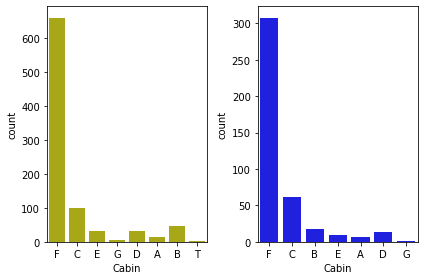

In [ ]:
for col in ['Cabin']:
  print(f"Countplot of {col}")
  f, ax = plt.subplots(ncols=2)
  sns.countplot(hyp1_trn[col], color='y', ax=ax[0])
  sns.countplot(hyp1_tst[col], color='b', ax=ax[1])
  plt.tight_layout()
  plt.show()

Countplot of Cabin


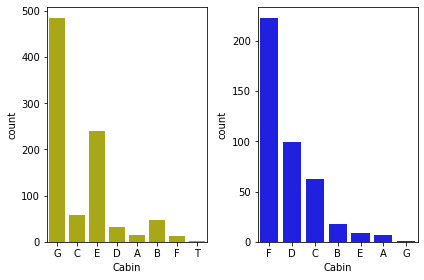

In [ ]:
cls_1 = ["A", "B", "C", "D", "E"]
p_1 = [0.05, 0.25, 0.4, 0.15, 0.15]
cls_2 = ["D", "E"]
p_2 = [0.7, 0.3]
cls_3 = ["F", "G"]
p_3 = [0.8, 0.2]

trn_rd_cabin1 = np.random.choice(cls_1, 40, p=p_1)
trn_rd_cabin2 = np.random.choice(cls_2, 168, p=p_2)
trn_rd_cabin3 = np.random.choice(cls_3, 479, p=p_3)

tst_rd_cabin1 = np.random.choice(cls_1, 27, p=p_1)
tst_rd_cabin2 = np.random.choice(cls_2, 86, p=p_2)
tst_rd_cabin3 = np.random.choice(cls_3, 214, p=p_3)

hyp2_trn['Cabin'] = hyp2_trn['Cabin'].fillna("NONE")
hyp2_tst['Cabin'] = hyp2_tst['Cabin'].fillna("NONE")

hyp2_trn['Cabin'][hyp2_trn['Pclass']==1] = hyp2_trn['Cabin'][hyp2_trn['Pclass']==1].replace("NONE", np.random.choice(trn_rd_cabin1))
hyp2_trn['Cabin'][hyp2_trn['Pclass']==2] = hyp2_trn['Cabin'][hyp2_trn['Pclass']==2].replace("NONE", np.random.choice(trn_rd_cabin2))
hyp2_trn['Cabin'][hyp2_trn['Pclass']==3] = hyp2_trn['Cabin'][hyp2_trn['Pclass']==3].replace("NONE", np.random.choice(trn_rd_cabin3))

hyp2_tst['Cabin'][hyp2_tst['Pclass']==1] = hyp2_tst['Cabin'][hyp2_tst['Pclass']==1].replace("NONE", np.random.choice(tst_rd_cabin1))
hyp2_tst['Cabin'][hyp2_tst['Pclass']==2] = hyp2_tst['Cabin'][hyp2_tst['Pclass']==2].replace("NONE", np.random.choice(tst_rd_cabin2))
hyp2_tst['Cabin'][hyp2_tst['Pclass']==3] = hyp2_tst['Cabin'][hyp2_tst['Pclass']==3].replace("NONE", np.random.choice(tst_rd_cabin3))

hyp2_trn['Cabin'] = hyp2_trn['Cabin'].apply(lambda x : x[:1])
hyp2_tst['Cabin'] = hyp2_tst['Cabin'].apply(lambda x: x[:1])

for col in ['Cabin']:
  print(f"Countplot of {col}")
  f, ax = plt.subplots(ncols=2)
  sns.countplot(hyp2_trn[col], color='y', ax=ax[0])
  sns.countplot(hyp2_tst[col], color='b', ax=ax[1])
  plt.tight_layout()
  plt.show()

아무리 3등석의 사람들을 좁은 선실에 머물게 한다고 해도, CabinF가 수용 가능한 인원이 있을 것으로 생각됨.

상등 클래스의 사람들이 넓은 공간의 선실을 사용하기 때문에, 선실의 수가 마땅치 않을 수는 있지만, train과 test를 합쳐서 저 정도가 나오는 것은 말이 안 됨.

### ways to fill missing values

In [ ]:
# Age : median으로 채워줌
  #train ; median==28.0
trn_df['Age'] = trn_df['Age'].fillna(trn_df['Age'].median())
trn_df['Age'] = trn_df['Age'].astype('int')
  #test ; median==27.0
tst_df['Age'] = tst_df['Age'].fillna(tst_df['Age'].median())
tst_df['Age'] = tst_df['Age'].astype('int')

# Fare : mean으로 채워줌
  #train
trn_df['Fare'] = trn_df['Fare'].round(2)
  #test ; mean==35.6271884892086
tst_df['Fare'] = tst_df['Fare'].fillna(tst_df['Fare'].mean())
tst_df['Fare'] = tst_df['Fare'].round(2)

# Embarked  : mode로 채워줌
 #train ; mode=='S'
freq = trn_df['Embarked'].dropna().mode()[0]  # dropna없이 사용해서 에러발생했음
trn_df['Embarked'] = trn_df['Embarked'].fillna(freq)

# Cabin : 빈도를 확인한 후, 랜덤한 값으로 채워줌
cls_1 = ["A", "B", "C", "D", "E"]
p_1 = [0.05, 0.25, 0.4, 0.15, 0.15]
cls_2 = ["D", "E"]
p_2 = [0.7, 0.3]
cls_3 = ["E", "F", "G"]
p_3 = [0.1, 0.6, 0.3]
  # train
trn_rd_cabin1 = np.random.choice(cls_1, 40, p=p_1)  # 1st class의 cabin 결측치 = 40
trn_rd_cabin2 = np.random.choice(cls_2, 168, p=p_2) # 2nd class의 cabin 결측치 = 168
trn_rd_cabin3 = np.random.choice(cls_3, 479, p=p_3) # 3rd class의 cabin 결측치 = 479
  # test
tst_rd_cabin1 = np.random.choice(cls_1, 27, p=p_1)  # 1st class의 cabin 결측치 = 27
tst_rd_cabin2 = np.random.choice(cls_2, 86, p=p_2)  # 2nd class의 cabin 결측치 = 86
tst_rd_cabin3 = np.random.choice(cls_3, 214, p=p_3) # 3rd class의 cabin 결측치 = 214
  # np.NaN을 replace하려면 같은 type만 가능하기 때문에 우선 결측치를 string으로 바꿔줌
trn_df['Cabin'] = trn_df['Cabin'].fillna("N")
tst_df['Cabin'] = tst_df['Cabin'].fillna("N")
  # Cabin의 이니셜이 중요하다고 판단해서 숫자는 자름
trn_df['Cabin'] = trn_df['Cabin'].apply(lambda x : x[:1])
tst_df['Cabin'] = tst_df['Cabin'].apply(lambda x: x[:1])
  # 등석별 결측치 채워줌
trn_df['Cabin'][trn_df['Pclass']==1] = trn_df['Cabin'][trn_df['Pclass']==1].replace("N", np.random.choice(trn_rd_cabin1))
trn_df['Cabin'][trn_df['Pclass']==2] = trn_df['Cabin'][trn_df['Pclass']==2].replace("N", np.random.choice(trn_rd_cabin2))
trn_df['Cabin'][trn_df['Pclass']==3] = trn_df['Cabin'][trn_df['Pclass']==3].replace("N", np.random.choice(trn_rd_cabin3))
  # 등석별 결측치 채워줌
tst_df['Cabin'][tst_df['Pclass']==1] = tst_df['Cabin'][tst_df['Pclass']==1].replace("N", np.random.choice(tst_rd_cabin1))
tst_df['Cabin'][tst_df['Pclass']==2] = tst_df['Cabin'][tst_df['Pclass']==2].replace("N", np.random.choice(tst_rd_cabin2))
tst_df['Cabin'][tst_df['Pclass']==3] = tst_df['Cabin'][tst_df['Pclass']==3].replace("N", np.random.choice(tst_rd_cabin3))

In [ ]:
trn_df[trn_df['Fare']==0.0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
179,180,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,G,S,0
263,264,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,B,S,0
271,272,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,G,S,1
277,278,2,"Parkes, Mr. Francis ""Frank""",male,28,0,0,239853,0.0,E,S,0
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,G,S,0
413,414,2,"Cunningham, Mr. Alfred Fleming",male,28,0,0,239853,0.0,E,S,0
466,467,2,"Campbell, Mr. William",male,28,0,0,239853,0.0,E,S,0
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,28,0,0,239854,0.0,E,S,0
597,598,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,G,S,0
633,634,1,"Parr, Mr. William Henry Marsh",male,28,0,0,112052,0.0,C,S,0


비용이 0으로 처리된 이들은 단순히, 결측치를 말하는 것은 아닐 수도 있다. 동일한 embarked에서 탑승했다는 점과 등석의 다양성을 고려하면, 프로모션이나 특수 상황들을 배제하지 않을 수 없기 때문이다.

## Q2. 이름에 대한 속성을 분석하시오.


In [ ]:
middle_name = []
social_status = []
first_name = []
last_name = []

for chk in range(len(trn_df['Name'])):
  front = trn_df['Name'].iloc[chk].split('.')[0]
  back = trn_df['Name'].iloc[chk].split('.')[1]
  middle_name.append(front.split(',')[0].strip())
  social_status.append(front.split(',')[1].strip())
  first_name.append(back.split(' ')[1])
  if len(back.split(' ')[2:])!=0 :
    last_name.append(back.split(' ')[2:])
  else:
    last_name.append(["NONE"])
trn_df['SSTATUS'] = social_status

In [ ]:
middle_name = []
social_status = []
first_name = []
last_name = []

for chk in range(len(tst_df['Name'])):
  front = tst_df['Name'].iloc[chk].split('.')[0]
  back = tst_df['Name'].iloc[chk].split('.')[1]
  middle_name.append(front.split(',')[0].strip())
  social_status.append(front.split(',')[1].strip())
  first_name.append(back.split(' ')[1])
  if len(back.split(' ')[2:])!=0 :
    last_name.append(back.split(' ')[2:])
  else:
    last_name.append(["NONE"])
tst_df['SSTATUS'] = social_status

In [ ]:
trn_sstatus = [unq for unq in trn_df['SSTATUS'].unique()]
tst_sstatus = [unq for unq in tst_df['SSTATUS'].unique()]
both_sstatus = [trn for trn, tst in itertools.product(trn_sstatus, tst_sstatus) if trn==tst]

In [ ]:
trn_df[trn_df['SSTATUS']=='Don']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,SSTATUS,Privileged
30,31,1,"Uruchurtu, Don. Manuel E",NaN,2,0,0,PC 17601,27.72,NaN,NaN,0,Don,NaN


In [ ]:
tst_df[tst_df['SSTATUS']=='Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,SSTATUS,Privileged
414,1306,1,"Oliva y Ocana, Dona. Fermina",NaN,2,0,0,PC 17758,108.9,NaN,NaN,1,Dona,NaN


In [ ]:
trn_df[trn_df['SSTATUS']=='Jonkheer']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,SSTATUS,Privileged
822,823,1,"Reuchlin, Jonkheer. John George",NaN,2,0,0,19972,0.0,NaN,NaN,0,Jonkheer,NaN


Noblesse
  * 'Col'           : 육공군 대령 지칭
  * 'Capt'          : 해군 대령 지칭
  * 'the Countess'  : 백작부인
  * 'Dr'            : 박사(혹은 의사) 지칭
  * 'Sir'           : 남성 경칭
  * 'Jonkheer'      : 프로이센쪽 귀족 남성 지칭
  * 'Don'           : 남부유럽쪽 귀족 남성 지칭
  * 'Dona'          : 남부유럽족 귀족 여성 지칭
  * 'Mlle'          : 프랑스 젊은 여성 지칭
  * 'Lady'          : Life After Divorce Is Eventually Sane ; 미망인, 이혼 후 여성을 지칭하는 말
  * 'Mme'           : French for Mrs, Madames

middle-level
  * 'Rev' : 모든 성직자를 지칭하는 단어
  * 'Major' : 전공자, 여기서는 학사 수준의 교육을 받은 사람으로 간주
  * 'Master ; 석사, 석사 수준의 교육을 받을 정도의 재력(혹은 사회적 지위)가 있는 사람

undefined(normal people)
  * 'Mr'
  * 'Mrs'
  * 'Miss'
  * 'Ms'

In [ ]:
# Nobless~Middle-level을 특권층이라고 가정하고, 특권층은 과연 재난의 상황에선 어떻게 대응하는지 확인
Privileged = ['Col', 'Capt', 'the Countess', 'Dr', 'Sir', 'Jonkheer', 'Dona', 'Don', 'Mlle', 'Lady', 'Mme', 'Rev', 'Major', 'Master']
Undefined = ['Mrs', 'Miss', 'Mr', 'Ms']

trn_df['Privileged'] = trn_df['SSTATUS'].copy()
for priv in Privileged:
  trn_df['Privileged'] = trn_df['Privileged'].apply(lambda x: re.sub(priv,'Y',x))
for undef in Undefined:
  trn_df['Privileged'] = trn_df['Privileged'].apply(lambda x: re.sub(undef,'N',x))

tst_df['Privileged'] = tst_df['SSTATUS'].copy()
for priv in Privileged:
  tst_df['Privileged'] = tst_df['Privileged'].apply(lambda x: re.sub(priv,'Y',x))
for undef in Undefined:
  tst_df['Privileged'] = tst_df['Privileged'].apply(lambda x: re.sub(undef,'N',x))

In [ ]:
# 강사님 방법
# def get_title(name):
#   title_search = re.search(['([A-Za-z]+\.'], name)
#   if title_search:
#     return title_search.group(1)
#   return " "

# for dataset in full_data:
#   dataset['Title'] = dataset['Name'].apply(get_title)
# for dataset in full_data:
#   dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
# dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
# dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

## Q3. 나이대별로 binning 작업을 하시오.
나이대별로 binning 작업을 하여서 검증 하시오.

In [ ]:
# trn.avg = ~.mean()
# trn.std = ~.std()

In [ ]:
# trn_df['Age'].quantile(0.25)  # 22.0
# trn_df['Age'].quantile(0.75)  # 35.0
# trn_df['Age'].min()           # 0
# trn_df['Age'].max()           # 80
# trn_df['Age'].mode()          # 28
# trn_df['Age'].median()        # 28
# trn_df['Age'].std()           # 13.028211862792078

In [ ]:
80/5

16.0

In [ ]:
trn_df.loc[trn_df['Age']<=16, 'Age'] = 0
trn_df.loc[(trn_df['Age']>16) & (trn_df['Age']<=32), 'Age'] = 1
trn_df.loc[(trn_df['Age']>32) & (trn_df['Age']<=48), 'Age'] = 2
trn_df.loc[(trn_df['Age']>48) & (trn_df['Age']<=64), 'Age'] = 3
trn_df.loc[trn_df['Age']>64, 'Age'] = 4

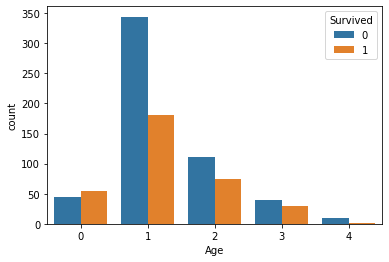

In [ ]:
sns.countplot(x='Age', hue='Survived', data=trn_df)

In [ ]:
# tst_df['Age'].quantile(0.25)  # 23.0
# tst_df['Age'].quantile(0.75)  # 37.75
# tst_df['Age'].min()           # 0
# tst_df['Age'].max()           # 76
# tst_df['Age'].mode()          # 27
# tst_df['Age'].median()        # 27
# tst_df['Age'].std()           # 12.721533412555162

In [ ]:
tst_df.loc[tst_df['Age']<=15, 'Age'] = 0
tst_df.loc[(tst_df['Age']>15) & (tst_df['Age']<=30), 'Age'] = 1
tst_df.loc[(tst_df['Age']>30) & (tst_df['Age']<=45), 'Age'] = 2
tst_df.loc[(tst_df['Age']>45) & (tst_df['Age']<=60), 'Age'] = 3
tst_df.loc[tst_df['Age']>60, 'Age'] = 4

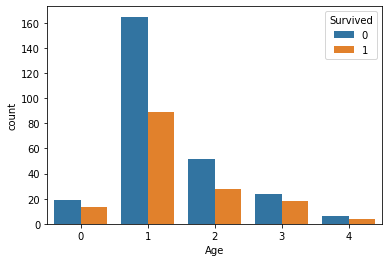

In [ ]:
sns.countplot(x='Age', hue='Survived', data=tst_df)

train과 test의 나이 최대값을 5로 나눈 값이 큰 차이가 나지 않기 때문에 16살, 15살씩 binning

## Q4. 가설을 설정하고 데이터로 검증한 결과를 코드로 첨부하시오.
2가지 이상의 가설을 설정하고 데이터로 검증한 결과를 코드로 첨부하시오.

In [ ]:
trn_df['Sex'] = trn_df['Sex'].map({'male':0, 'female':1})
trn_df['Cabin'] = trn_df['Cabin'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':0})
trn_df['Embarked'] = trn_df['Embarked'].map({'C':1, 'S':2, 'Q':3})
trn_df['Privileged'] = trn_df['Privileged'].map({'N':0, 'Y':1})

tst_df['Sex'] = tst_df['Sex'].map({'male':0, 'female':1})
tst_df['Cabin'] = tst_df['Cabin'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':0})
tst_df['Embarked'] = tst_df['Embarked'].map({'C':1, 'S':2, 'Q':3})
tst_df['Privileged'] = tst_df['Privileged'].map({'N':0, 'Y':1})

In [ ]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          0 non-null      float64
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        0 non-null      float64
 10  Embarked     0 non-null      float64
 11  Survived     891 non-null    int64  
 12  SSTATUS      891 non-null    object 
 13  Privileged   0 non-null      float64
dtypes: float64(5), int64(6), object(3)
memory usage: 144.4+ KB


In [ ]:
trn_df.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Privileged
PassengerId,1.000000,-0.035144,-0.042939,0.026528,-0.057527,-0.001652,0.012660,-0.036702,-0.017443,-0.005007,0.024459
Pclass,-0.035144,1.000000,-0.131900,-0.358005,0.083081,0.018443,-0.549496,0.935169,0.305762,-0.338481,-0.068572
Sex,-0.042939,-0.131900,1.000000,-0.071125,0.114631,0.245489,0.182332,-0.110650,-0.022521,0.543351,-0.154828
Age,0.026528,-0.358005,-0.071125,1.000000,-0.218846,-0.134014,0.124320,-0.324085,-0.066551,-0.044492,-0.132206
SibSp,-0.057527,0.083081,0.114631,-0.218846,1.000000,0.414838,0.159653,0.100631,0.030874,-0.035322,0.254618
Parch,-0.001652,0.018443,0.245489,-0.134014,0.414838,1.000000,0.216230,0.024991,-0.035957,0.081629,0.169242
Fare,0.012660,-0.549496,0.182332,0.124320,0.159653,0.216230,1.000000,-0.495823,-0.268863,0.257305,0.026374
Cabin,-0.036702,0.935169,-0.110650,-0.324085,0.100631,0.024991,-0.495823,1.000000,0.295849,-0.298620,-0.095106
Embarked,-0.017443,0.305762,-0.022521,-0.066551,0.030874,-0.035957,-0.268863,0.295849,1.000000,-0.125953,-0.010492
Survived,-0.005007,-0.338481,0.543351,-0.044492,-0.035322,0.081629,0.257305,-0.298620,-0.125953,1.000000,0.076372


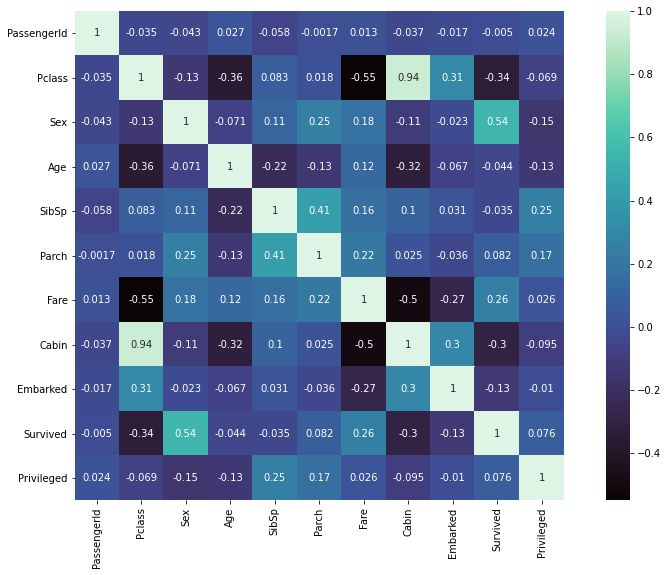

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(trn_df.corr(), annot=True, square=True, cmap='mako')

<Figure size 1080x648 with 0 Axes>

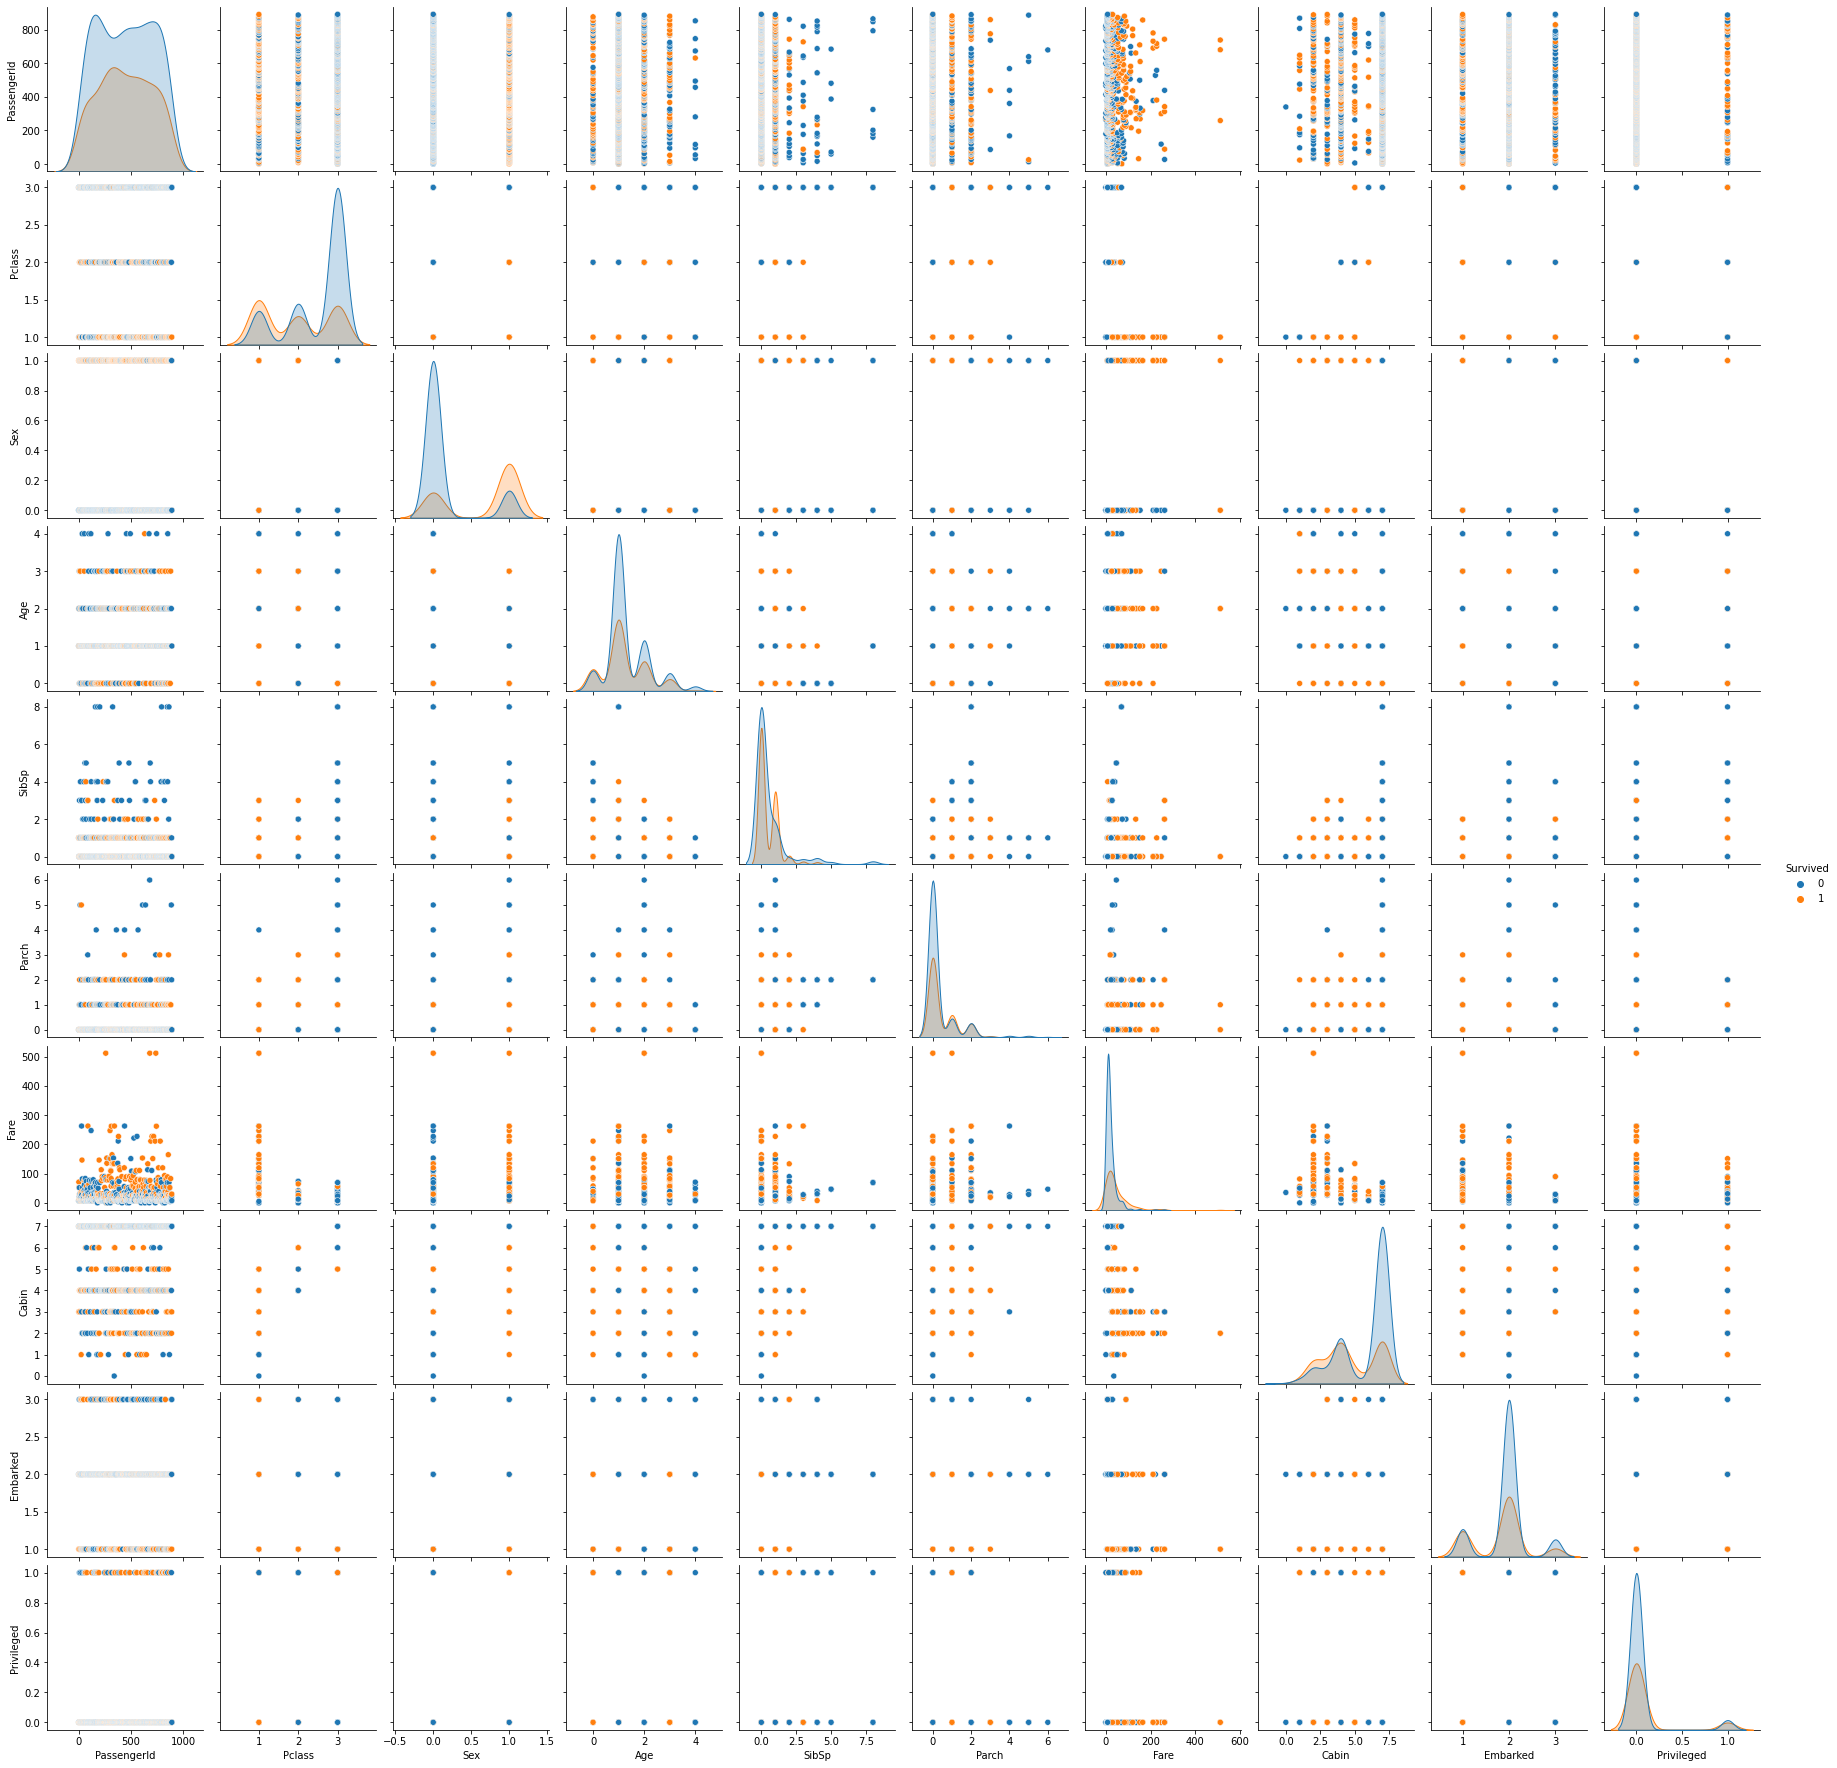

In [ ]:
plt.figure(figsize=(15,9))
sns.pairplot(trn_df, hue='Survived')

### hypothesis 5. Does Noblesse Oblige(english : nobility obliges) always manifest under the crisis circumstance?

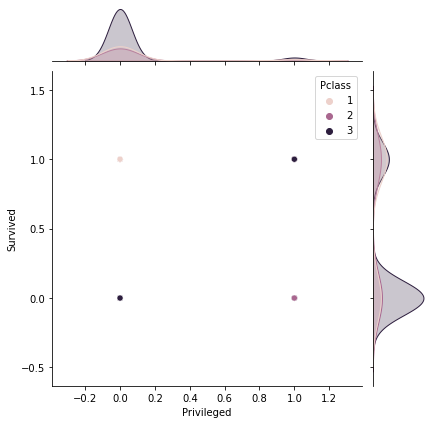

In [ ]:
sns.jointplot(x='Privileged', y='Survived', data=trn_df, hue='Pclass')

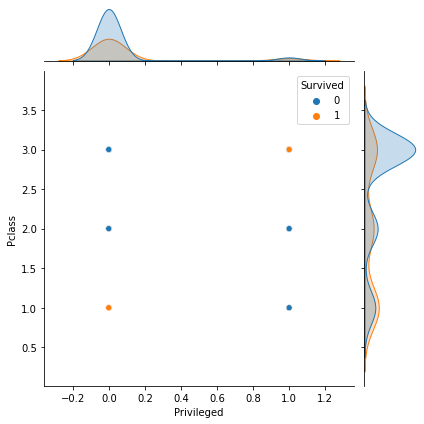

In [ ]:
sns.jointplot(x='Privileged', y='Pclass', data=trn_df, hue='Survived')

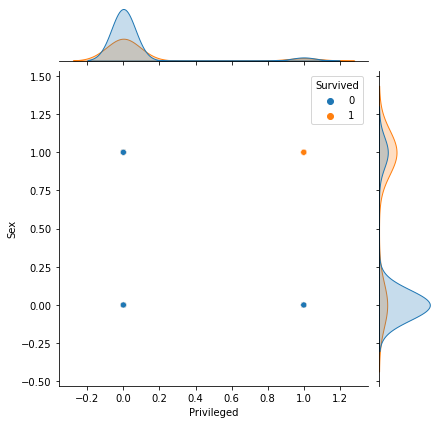

In [ ]:
sns.jointplot(x='Privileged', y='Sex', data=trn_df, hue='Survived')

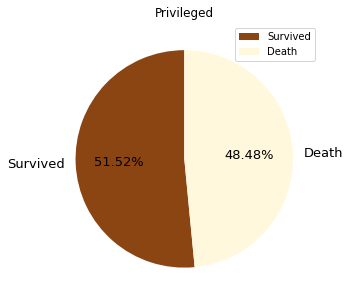

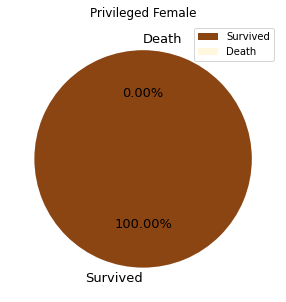

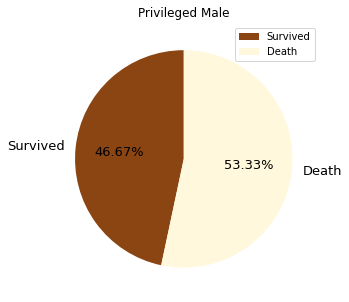

In [ ]:
label = ['Survived', 'Death']
trn_pv = [round(34/66*100, 2), round(32/66*100, 2)]
trn_pv_f = [round(6/6*100, 2), round(0/6*100, 2)]
trn_pv_m = [round(28/60*100, 2), round(32/60*100, 2)]
pie_lst = [trn_pv, trn_pv_f, trn_pv_m]

color = ['saddlebrown','cornsilk']

for idx, p in enumerate(pie_lst):
  plt.figure(figsize=(5,5))
  plt.pie(p, labels = label, autopct='%1.2f%%',
          startangle = 90, textprops = {'fontsize':13}, colors = color)
  if idx==0:
    plt.title('Privileged')
  elif idx==1:
    plt.title('Privileged Female')
  else:
    plt.title('Privileged Male')
  plt.legend(labels=label, loc='upper right')
  plt.show()

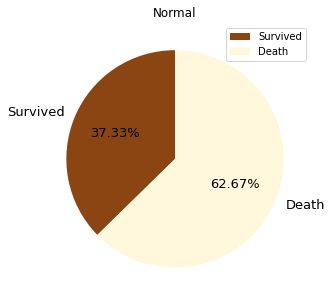

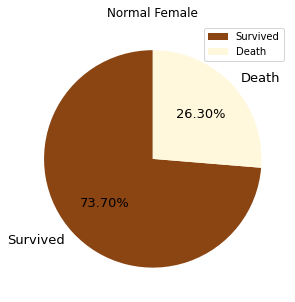

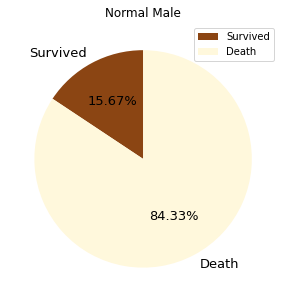

In [ ]:
label = ['Survived', 'Death']
trn_nm = [round(308/825*100, 2), round(517/825*100, 2)]
trn_nm_f = [round(227/308*100, 2), round(81/308*100, 2)]
trn_nm_m = [round(81/517*100, 2), round(436/517*100, 2)]
pie_lst2 = [trn_nm, trn_nm_f, trn_nm_m]

color = ['saddlebrown','cornsilk']

for idx, p in enumerate(pie_lst2):
  plt.figure(figsize=(5,5))
  plt.pie(p, labels = label, autopct='%1.2f%%',
          startangle = 90, textprops = {'fontsize':13}, colors = color)
  if idx==0:
    plt.title('Normal')
  elif idx==1:
    plt.title('Normal Female')
  else:
    plt.title('Normal Male')
  plt.legend(labels=label, loc='upper right')
  plt.show()

In [ ]:
for n in first_name:
  if 'Straus' in n:
    print(n)
for n in last_name:
  if 'Straus' in n:
    print(n)
for idx, n in enumerate(middle_name):
  if 'Straus' in n:
    print(idx)

81
114


In [ ]:
tst_df.iloc[[81,114], :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,SSTATUS,Privileged
81,973,1,"Straus, Mr. Isidor",0,4,1,0,PC 17483,221.78,3,2,0,Mr,0
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,4,1,0,PC 17483,221.78,3,2,1,Mrs,0


유명 백화점(메이시스)의 소유주인 스트라우스 부부는 사회계층을 굳이 분류하자면, 상위층에 속할 것이 분명함에도 작위가 없다는 이유로 현재 분류한 특권계층이 아닌 Undefine에 속한다.

물론 위기의 순간에서 본인의 이념을 지킬 수 있는 사람이 몇이나 되겠냐만은, 확실한 건 노블레스 말라드까지는 아니지만, 노블레스 오블리주를 지키지 못한 이들이 많다는 것이라고 생각했다.

결론 : 사회적 지위가 높거나, 높은 수준의 교육을 받는다고 해서 모두가 신념을 1순위로 생각하진 않는다.

### hypothesis 6. Do they concern care for the socially disadvantaged even faced crisis?

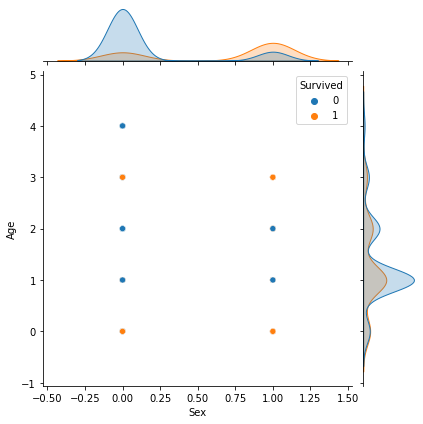

In [ ]:
sns.jointplot(x='Sex', y='Age', data=trn_df, hue='Survived')

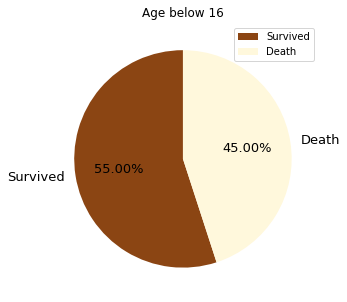

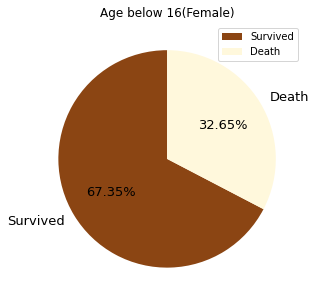

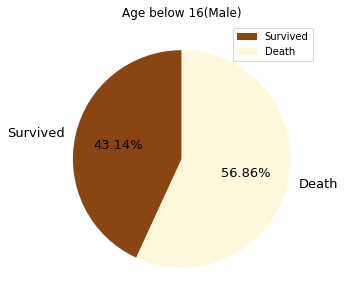

In [ ]:
label = ['Survived', 'Death']
trn_a0 = [round(55/100*100, 2), round(45/100*100, 2)]
trn_a0_f = [round(33/49*100, 2), round(16/49*100, 2)]
trn_a0_m = [round(22/51*100, 2), round(29/51*100, 2)]
pie_lst3 = [trn_a0, trn_a0_f, trn_a0_m]

color = ['saddlebrown','cornsilk']

for idx, p in enumerate(pie_lst3):
  plt.figure(figsize=(5,5))
  plt.pie(p, labels = label, autopct='%1.2f%%',
          startangle = 90, textprops = {'fontsize':13}, colors = color)
  if idx==0:
    plt.title('Age below 16')
  elif idx==1:
    plt.title('Age below 16(Female)')
  else:
    plt.title('Age below 16(Male)')
  plt.legend(labels=label, loc='upper right')
  plt.show()

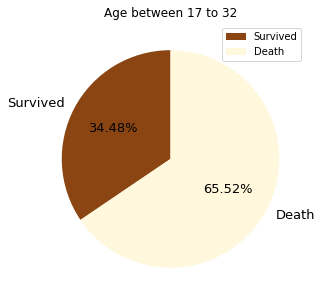

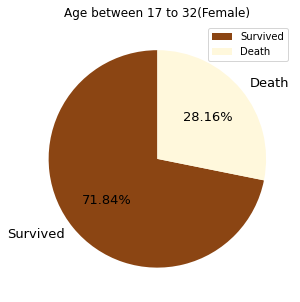

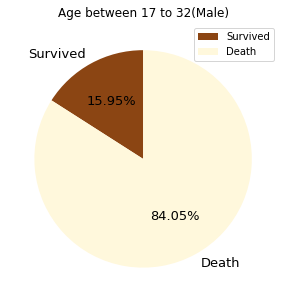

In [ ]:
label = ['Survived', 'Death']
trn_a1 = [round(181/525*100, 2), round(344/525*100, 2)]
trn_a1_f = [round(125/174*100, 2), round(49/174*100, 2)]
trn_a1_m = [round(56/351*100, 2), round(295/351*100, 2)]
pie_lst4 = [trn_a1, trn_a1_f, trn_a1_m]

color = ['saddlebrown','cornsilk']

for idx, p in enumerate(pie_lst4):
  plt.figure(figsize=(5,5))
  plt.pie(p, labels = label, autopct='%1.2f%%',
          startangle = 90, textprops = {'fontsize':13}, colors = color)
  if idx==0:
    plt.title('Age between 17 to 32')
  elif idx==1:
    plt.title('Age between 17 to 32(Female)')
  else:
    plt.title('Age between 17 to 32(Male)')
  plt.legend(labels=label, loc='upper right')
  plt.show()

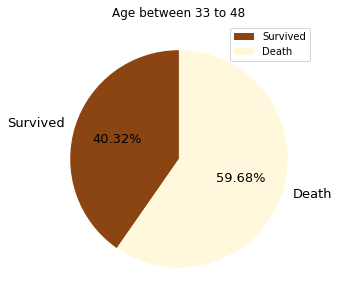

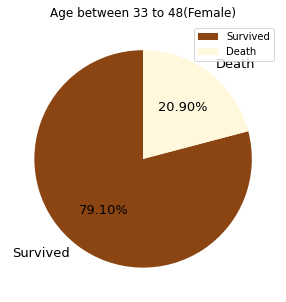

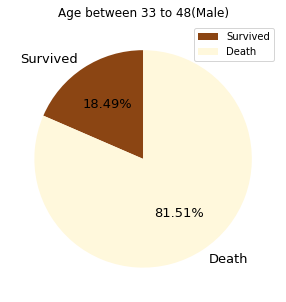

In [ ]:
label = ['Survived', 'Death']
trn_a2 = [round(75/186*100, 2), round(111/186*100, 2)]
trn_a2_f = [round(53/67*100, 2), round(14/67*100, 2)]
trn_a2_m = [round(22/119*100, 2), round(97/119*100, 2)]
pie_lst5 = [trn_a2, trn_a2_f, trn_a2_m]

color = ['saddlebrown','cornsilk']

for idx, p in enumerate(pie_lst5):
  plt.figure(figsize=(5,5))
  plt.pie(p, labels = label, autopct='%1.2f%%',
          startangle = 90, textprops = {'fontsize':13}, colors = color)
  if idx==0:
    plt.title('Age between 33 to 48')
  elif idx==1:
    plt.title('Age between 33 to 48(Female)')
  else:
    plt.title('Age between 33 to 48(Male)')
  plt.legend(labels=label, loc='upper right')
  plt.show()

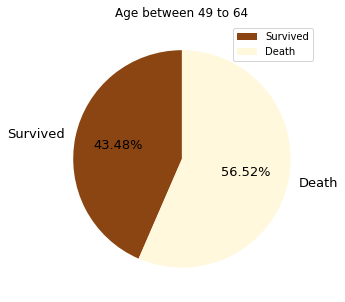

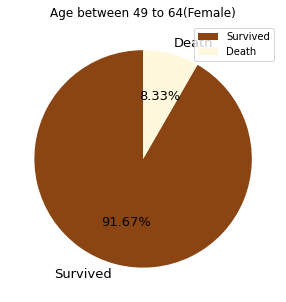

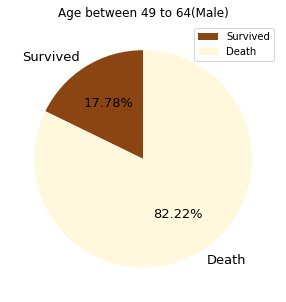

In [ ]:
label = ['Survived', 'Death']
trn_a3 = [round(30/69*100, 2), round(39/69*100, 2)]
trn_a3_f = [round(22/24*100, 2), round(2/24*100, 2)]
trn_a3_m = [round(8/45*100, 2), round(37/45*100, 2)]

pie_lst6 = [trn_a3, trn_a3_f, trn_a3_m]

color = ['saddlebrown','cornsilk']

for idx, p in enumerate(pie_lst6):
  plt.figure(figsize=(5,5))
  plt.pie(p, labels = label, autopct='%1.2f%%',
          startangle = 90, textprops = {'fontsize':13}, colors = color)
  if idx==0:
    plt.title('Age between 49 to 64')
  elif idx==1:
    plt.title('Age between 49 to 64(Female)')
  else:
    plt.title('Age between 49 to 64(Male)')
  plt.legend(labels=label, loc='upper right')
  plt.show()

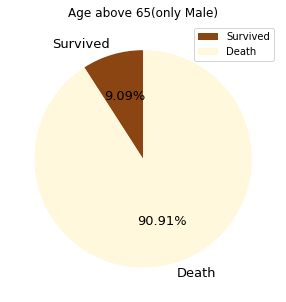

In [ ]:
label = ['Survived', 'Death']
trn_a4 = [round(1/11*100, 2), round(10/11*100, 2)]

color = ['saddlebrown','cornsilk']

plt.figure(figsize=(5,5))
plt.pie(trn_a4, labels = label, autopct='%1.2f%%',
        startangle = 90, textprops = {'fontsize':13}, colors = color)
plt.title('Age above 65(only Male)')
plt.legend(labels=label, loc='upper right')
plt.show()

In [ ]:
trn_df[trn_df['Sex']==1].count()

PassengerId    314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin          314
Embarked       314
Survived       314
SSTATUS        314
Privileged     314
dtype: int64

청소년기에 속하는 이들의 전반적인 생존율은 55%를 넘었고, 청장년층의 생존율을 35% 정도였으며, 중장년층은 40~43%, 노년층만 10%미만이었다. 

 또한, 여성의 생존율이 남성의 생존율을 앞서는 이유에는 집단지성과 연관이 있는지 궁금해서 전체 성비와 각 집단의 생존율을 확인해봤다. 전체 성비(남성 64.75%)를 웃도는 연령대별 여성의 생존율에 성별이 바뀌지 않는 한 이해 못 할 그들의 숭고한 선택이 놀라웠다.(절대적 수치가 아니지만 놀랐음)

## Q5. 앙상블의 방법 중 stacking을 적용하시오.

In [ ]:
X_trn = trn_df.loc[:, [col for col in trn_df.columns if (trn_df[col].dtype!=object) and (col!='Survived')]]
y_trn = trn_df['Survived']
X_tst = tst_df.loc[:, [col for col in tst_df.columns if (tst_df[col].dtype!=object) and (col!='Survived')]]
y_tst = tst_df['Survived']

In [ ]:
X_trn.shape

(891, 10)

In [ ]:
X_trn.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Privileged     0
dtype: int64

In [ ]:
X_tst.shape

(418, 10)

In [ ]:
# 강사님 방법
# from sklearn.model_selection import KFold

# ntrain = train.shape[0]
# ntest = test.shape[0]
# NFOLDS = 5
# kf = KFold(n_splits=NFOLDS, random_state=42)
# kf.split(ntrain)

# class SKlearnHelper(object):
#   def __init__(self, clf, seed=42, params=None):
#     params['random_state'] = seed
#     self.clf = clf(**params)

#   def train(self, x_train, y_train):
#     self.clf.fit(x_train, y_train)
    
#   def predict(self, x):
#     return self.predict(x)

#   def fit(self, x, y):
#     return self.clf.fit(x,y)

#   def feature_importance(self, x, y):
#     print(self.clf.fit(x, y).feature_importance_)

# # leave-one-out Cross-validation
# def get_oof(clf, x_train, y_train, x_test):
#   oof_train = np.zeros((n_train, ))
#   oof_test = np.zeros((n_test, ))
#   oof_test_skf = np.empty((5, n_test))

#   for i, (train_index, test_index) in enumerate(kf):
#     x_tr = x_train[train_index]
#     y_tr = y_train[train_index]
#     x_ts = x_train[test_index]

#     clf.fit(x_tr, y_tr)

#     oof_train[test_index] = clf.predict(x_ts)
#     oof_test_skf[i, :] = clf.predict(x_test)

#     oof_test[:] = oof_test_skf.mean(axis=1)
#     return oof_train.reshape(-1, 1), oof_test_reshape(-1, 1)

# rf = SKlearnHelper(clf=RandomForestClassfier, seed=42, params=as:kdimfkmw)
# GBM = SKlearnHelper(clf=Graid)

# get_off(rf, x_train, y_train, x_test)

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 82kB/s 


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_trn, y_trn, stratify=y_trn, random_state=42)

Learning rate set to 0.008672
0:	learn: 0.6881450	total: 1.45ms	remaining: 1.45s
1:	learn: 0.6824866	total: 2.59ms	remaining: 1.29s
2:	learn: 0.6768397	total: 3.71ms	remaining: 1.23s
3:	learn: 0.6712684	total: 4.83ms	remaining: 1.2s
4:	learn: 0.6661158	total: 5.95ms	remaining: 1.18s
5:	learn: 0.6607837	total: 7.09ms	remaining: 1.18s
6:	learn: 0.6554838	total: 8.21ms	remaining: 1.16s
7:	learn: 0.6504974	total: 9.34ms	remaining: 1.16s
8:	learn: 0.6459371	total: 10.5ms	remaining: 1.15s
9:	learn: 0.6412632	total: 11.6ms	remaining: 1.15s
10:	learn: 0.6362645	total: 12.8ms	remaining: 1.15s
11:	learn: 0.6311851	total: 14.2ms	remaining: 1.17s
12:	learn: 0.6270743	total: 15.6ms	remaining: 1.18s
13:	learn: 0.6224171	total: 17.1ms	remaining: 1.2s
14:	learn: 0.6183191	total: 18.8ms	remaining: 1.24s
15:	learn: 0.6137373	total: 20.2ms	remaining: 1.24s
16:	learn: 0.6096515	total: 21.6ms	remaining: 1.25s
17:	learn: 0.6068898	total: 22.5ms	remaining: 1.23s
18:	learn: 0.6045540	total: 23.3ms	remaining: 

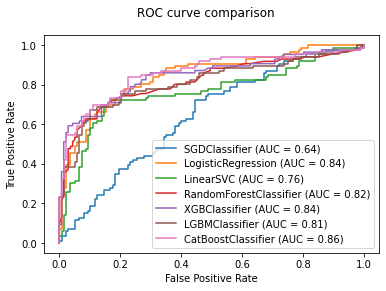

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
lreg = LogisticRegression(random_state=42)
lreg.fit(X_train, y_train)
lsvc = LinearSVC(random_state=42)
lsvc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
cat = CatBoostClassifier(random_state=42)
cat.fit(X_train, y_train)

sgd_disp = plot_roc_curve(sgd, X_val, y_val)
lreg_disp = plot_roc_curve(lreg, X_val, y_val, ax=sgd_disp.ax_)
lsvc_disp = plot_roc_curve(lsvc, X_val, y_val, ax=sgd_disp.ax_)
rfc_disp = plot_roc_curve(rfc, X_val, y_val, ax=sgd_disp.ax_)
xgb_disp = plot_roc_curve(xgb, X_val, y_val, ax=sgd_disp.ax_)
lgbm_disp = plot_roc_curve(lgbm, X_val, y_val, ax=sgd_disp.ax_)
cat_disp = plot_roc_curve(cat, X_val, y_val, ax=sgd_disp.ax_)
cat_disp.figure_.suptitle("ROC curve comparison")

plt.show()

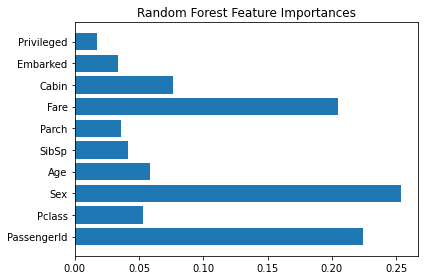

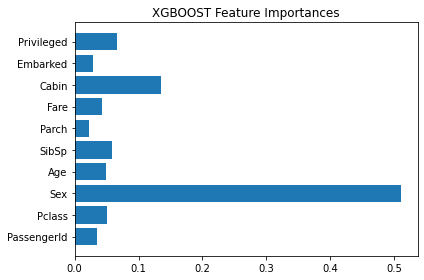

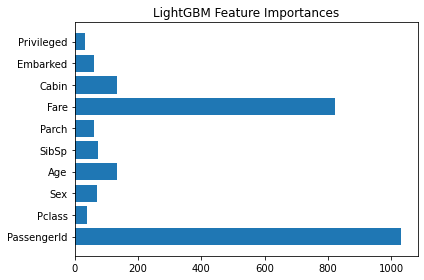

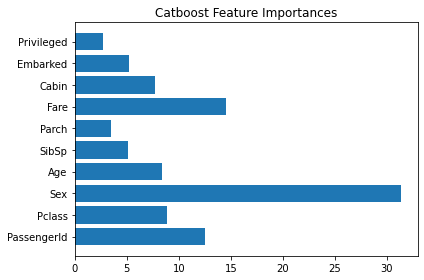

In [ ]:
labels = [col for col in X_trn.columns]

fig, ax = plt.subplots()
ax.barh(labels, rfc.feature_importances_)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.barh(labels, xgb.feature_importances_)
ax.set_title("XGBOOST Feature Importances")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.barh(labels, lgbm.feature_importances_)
ax.set_title("LightGBM Feature Importances")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.barh(labels, cat.feature_importances_)
ax.set_title("Catboost Feature Importances")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

estimators = [('rfc', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('lsvc', make_pipeline(StandardScaler(), LinearSVC(random_state=42))),
               ('xgb', XGBClassifier(n_estimators=5, random_state=42)),
              ('cat', CatBoostClassifier(random_state=42))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

X_train, X_val, y_train, y_val = train_test_split(X_trn, y_trn, stratify=y_trn, random_state=42)

clf.fit(X_train, y_train).score(X_val, y_val) #0.8071748878923767

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6681776	total: 6.23ms	remaining: 1.24s
5:	learn: 0.6631830	total: 7.33ms	remaining: 1.21s
6:	learn: 0.6583637	total: 8.43ms	remaining: 1.2s
7:	learn: 0.6537401	total: 9.5ms	remaining: 1.18s
8:	learn: 0.6490768	total: 10.6ms	remaining: 1.16s
9:	learn: 0.6444768	total: 11.6ms	remaining: 1.15s
10:	learn: 0.6400888	total: 12.7ms	remaining: 1.14s
11:	learn: 0.6353950	total: 13.8ms	remaining: 1.13s
12:	learn: 0.6307510	total: 14.9ms	remaining: 1.13s
13:	learn: 0.6259504	total: 16.3ms	remaining: 1.15s
14:	learn: 0.6215506	total: 20.6ms	remaining: 1.35s
15:	learn: 0.6171838	total: 23.8ms	remaining: 1.46s
16:	learn: 0.6147464	total: 24.4ms	remaining: 1.41s
17:	learn: 0.6103833	total: 25.7ms	remaining: 1.4s
18:	learn: 0.6062539	total: 26.8ms	remaining: 1.38s
19:	learn: 0.6022793	total: 27.9ms	remaining: 1.37s
20:	learn: 0.5985638	total: 29.1ms	remaining: 1.36s
21:	learn: 0.5945226	total: 30.2ms	remaining: 1.34s
22:	learn: 0.5923616	t

0.8071748878923767

In [ ]:
y_tst.shape

(418,)

In [ ]:
y_pred = clf.predict(X_tst)

In [ ]:
print(roc_auc_score(y_tst, clf.predict(X_tst)))

0.8646616541353384


# 빅데이터 플랫폼 요구사항 분석

-- Data : Bike Sharing Demand(https://www.kaggle.com/c/bike-sharing-demand/overview)

In [ ]:
import os
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

from os.path import join
MY_GOOGLE_DRIVE_PATH = "MyDrive/Task/"

KAGGLE = ".kaggle"
KAGGLE_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, KAGGLE)
os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_PATH
!pip install --upgrade --force-reinstall --no-deps kaggle
# %cd "{KAGGLE_PATH}"

PROJECT = "BikeSharingDemand"
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, PROJECT)
# !mkdir "{PROJECT_PATH}"
%cd "{PROJECT_PATH}"

# !kaggle competitions download -c bike-sharing-demand
# !unzip bike-sharing-demand.zip
# !rm bike-sharing-demand.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
/content/drive/.shortcut-targets-by-id/1srYR8TqwFsUSR4BYzQtIBmWUKrEBjd44/Task/BikeSharingDemand


In [ ]:
import time, datetime
from datetime import date, datetime, timedelta
import random
import re
import math
import itertools

import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as dp
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv(f"{PROJECT_PATH}/train.csv", encoding="UTF-8")
test = pd.read_csv(f"{PROJECT_PATH}/test.csv", encoding="UTF-8")
submission = pd.read_csv(f"{PROJECT_PATH}/sampleSubmission.csv", encoding="UTF-8")

In [ ]:
test = test.merge(submission, how='left')

## Q1. datetime의 속성을 sclicing이 가능하게 바꾸시오.

In [ ]:
[type(chk) for chk in train.datetime.head()]
# 원래도 slicing은 가능할 것 같은데..

[str, str, str, str, str]

In [ ]:
train.datetime = train.datetime.astype('datetime64[ns]')
test.datetime = test.datetime.astype('datetime64[ns]')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   count       6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 558.0 KB


In [ ]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## Q2. barplot을 사용하여 일/월/년과 시간대 별로 count의 수를 그려보시오.

In [ ]:
train['Date'] = train.datetime.apply(lambda x: x.strftime('%d'))
train['Month'] = train.datetime.apply(lambda x: x.strftime('%m'))
train['Year'] = train.datetime.apply(lambda x: x.strftime('%Y'))
train['Hour'] = train.datetime.apply(lambda x: x.strftime('%H'))

test['Date'] = test.datetime.apply(lambda x: x.strftime('%d'))
test['Month'] = test.datetime.apply(lambda x: x.strftime('%m'))
test['Year'] = test.datetime.apply(lambda x: x.strftime('%Y'))
test['Hour'] = test.datetime.apply(lambda x: x.strftime('%H'))

In [ ]:
train.groupby('Year').sum()['count']

Year
2011     781979
2012    1303497
Name: count, dtype: int64

In [ ]:
train.groupby('Month').sum()['count']

Month
01     79884
02     99113
03    133501
04    167402
05    200147
06    220733
07    214617
08    213516
09    212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [ ]:
train.groupby('Date').sum()['count']

Date
01    103692
02    105381
03    111561
04    112335
05    109115
06    108600
07    105486
08    102770
09    108041
10    111645
11    111146
12    109257
13    111448
14    112406
15    115677
16    109837
17    118255
18    108437
19    110387
Name: count, dtype: int64

In [ ]:
train.groupby('Hour').sum()['count']

Hour
00     25088
01     15372
02     10259
03      5091
04      2832
05      8935
06     34698
07     96968
08    165060
09    100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

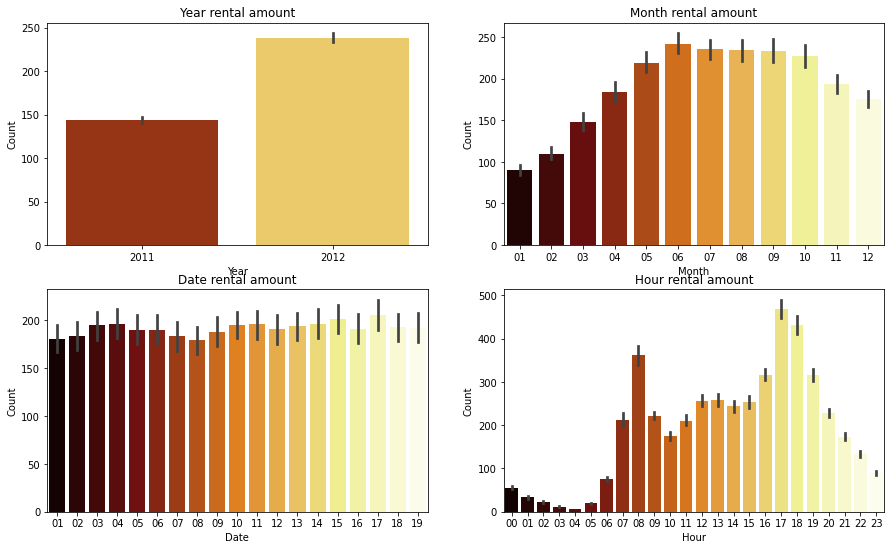

In [ ]:
f, ((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,ncols=2, figsize=(15,9))

sns.barplot(data=train, x="Year", y="count", ax=ax1, palette='afmhot')
sns.barplot(data=train, x="Month", y="count", ax=ax2, palette='afmhot')
sns.barplot(data=train, x="Date", y="count", ax=ax3, palette='afmhot')
sns.barplot(data=train, x="Hour", y="count", ax=ax4, palette='afmhot')

ax1.set(ylabel='Count', title ="Year rental amount")
ax2.set(ylabel='Count', title ="Month rental amount")
ax3.set(ylabel='Count', title ="Date rental amount")
ax4.set(ylabel='Count', title ="Hour rental amount")

plt.tight_layout
plt.show()

2012년에 이용량 증가, 일 수에 따른 특이점은 없지만, 겨울보다는 여름에 이용량이 많으며, 출퇴근 시간에 이용량이 많다.

## Q3. 상관점수를 봐서 상관이 없어 보이는 것의 속성은 무엇인지 검증하시오.

In [ ]:
train['Date'] = train['Date'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Year'] = train['Year'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

test['Date'] = test['Date'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Year'] = test['Year'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

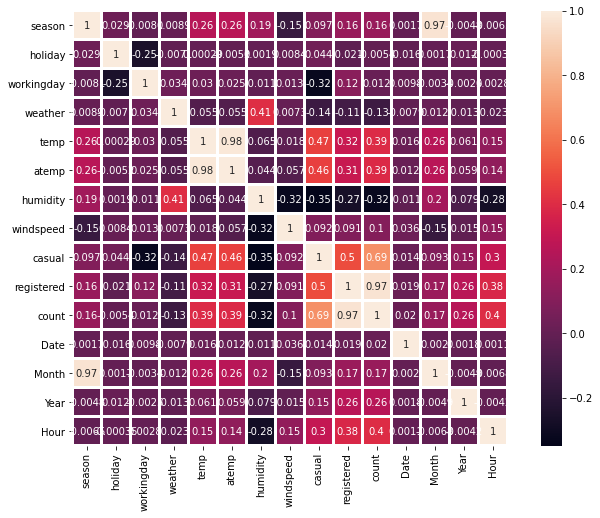

In [ ]:
f = plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, square=True, linewidths=2, cbar='mako')

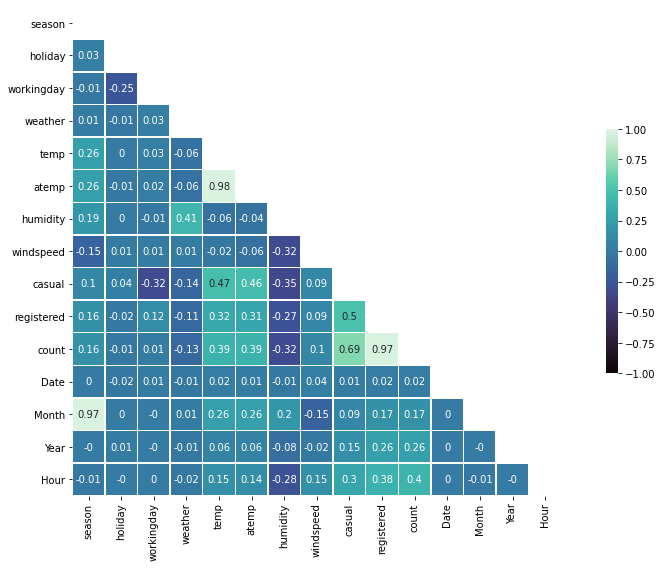

In [ ]:
df = train.corr()
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(round(df,2), cmap = 'mako', annot = True, mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1, square=True)  
plt.show()

In [ ]:
df['count'][df['count']>=0.4]

casual        0.690414
registered    0.970948
count         1.000000
Hour          0.400601
Name: count, dtype: float64

상관도가 0.4를 넘는 것은 casual, registered, hour를 제외하곤 없다.

In [ ]:
df['count'][df['count']>=0.3].index

Index(['temp', 'atemp', 'casual', 'registered', 'count', 'Hour'], dtype='object')

<Figure size 576x216 with 0 Axes>

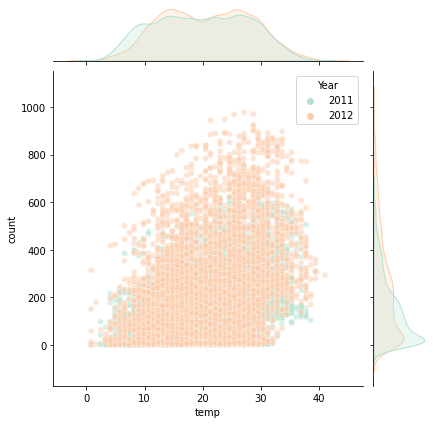

<Figure size 576x216 with 0 Axes>

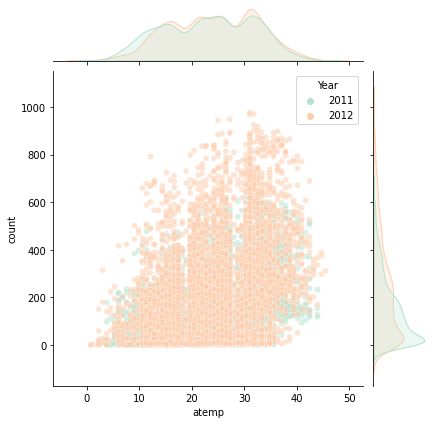

<Figure size 576x216 with 0 Axes>

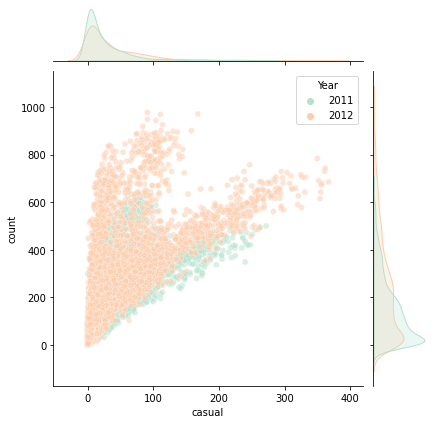

<Figure size 576x216 with 0 Axes>

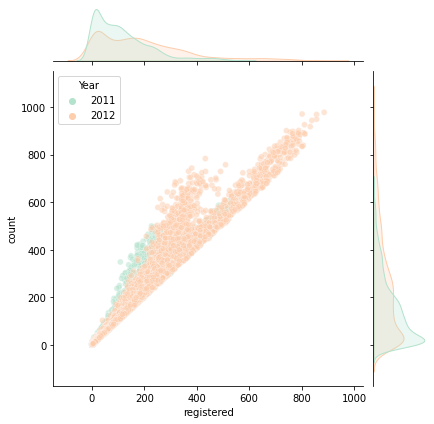

<Figure size 576x216 with 0 Axes>

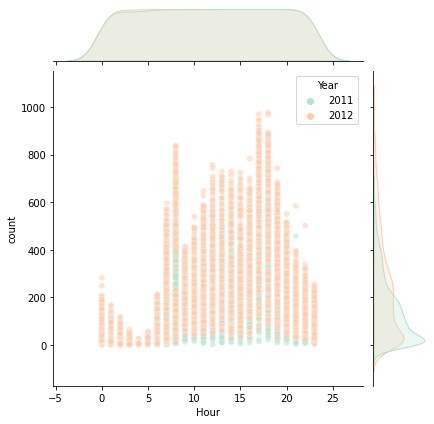

In [ ]:
check = ['temp', 'atemp', 'casual', 'registered', 'Hour']

for chk in check:
  plt.figure(figsize=(8,3))
  sns.jointplot(x=chk, y='count', hue='Year', data=train, palette='Pastel2', alpha=0.5)
  plt.tight_layout
  plt.show()

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

시간에 따른 이용량은 상관도가 있는 편이고, 등록 여부에 따라, 온도(체감온도)에 따라서도 이용량을 달라지는 양상을 보이고 있다.

## Q4. 이상치 처리 방법을 2가지 이상 적용해보고 검증하시오.

#### drop(IQR)

<Figure size 864x216 with 0 Axes>

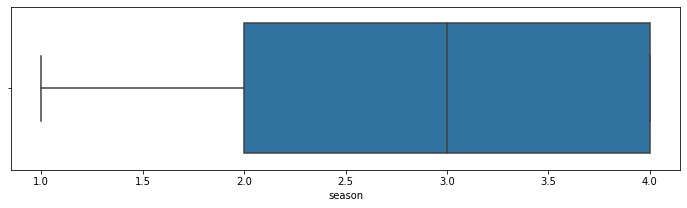

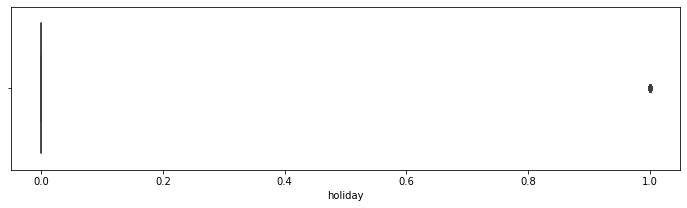

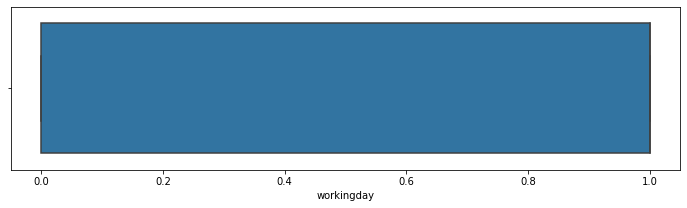

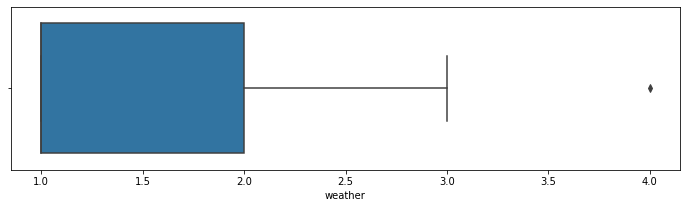

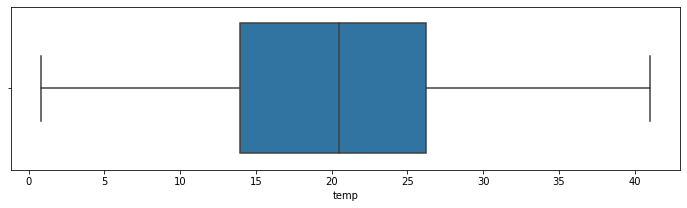

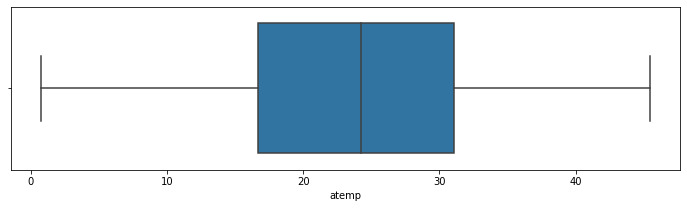

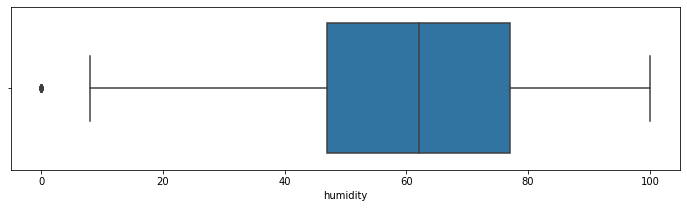

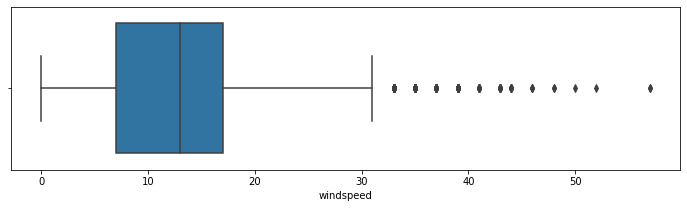

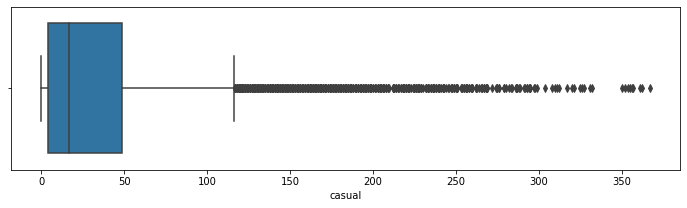

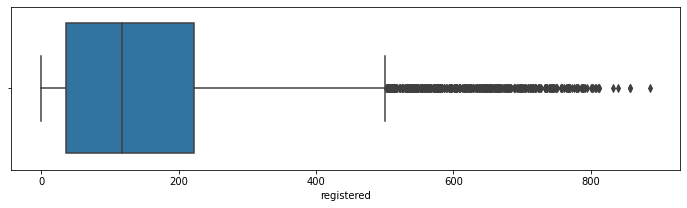

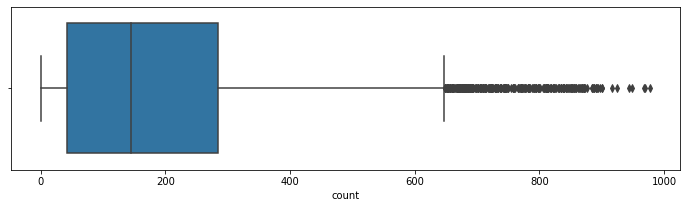

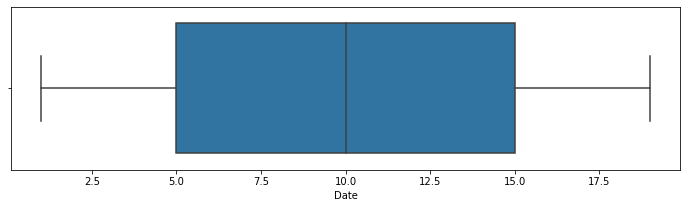

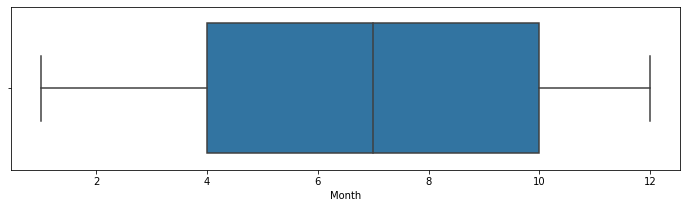

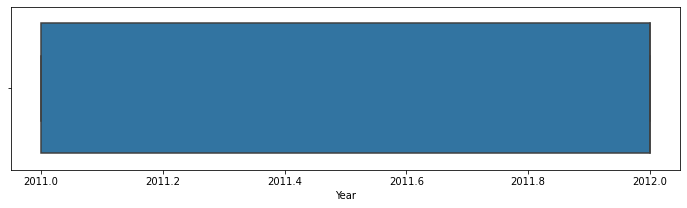

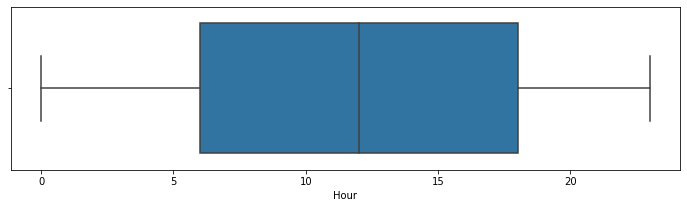

In [ ]:
for col in train.columns:
  try:
    plt.figure(figsize=(12,3))
    sns.boxplot(x=col, data=train)
    plt.tight_layout
    plt.show()
  except:
    pass

holiday, weather, humidity, windspeed, casual, registered, count

In [ ]:
outlier_col = ['holiday', 'weather', 'humidity', 'windspeed', 'casual', 'registered', 'count']
OL_IDX = []

for col in outlier_col:
  Q1 = train[col].quantile(0.25)
  Q3 = train[col].quantile(0.75)
  IQR = Q3-Q1
  OL_lst = train[(train[col]<Q1-(IQR*3))|(train[col]>Q3+(IQR*3))].index
  OL_IDX.extend(OL_lst)
OL_IDX = list(set(OL_IDX))

In [ ]:
len(OL_IDX)

621

In [ ]:
len(OL_IDX)/train.shape[0]  #이정도는 drop하는 게 나을 듯

0.05704574683079184

In [ ]:
train.drop(OL_IDX, inplace=True)

In [ ]:
train.shape

(10265, 16)

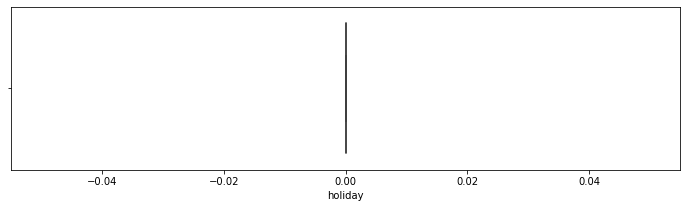

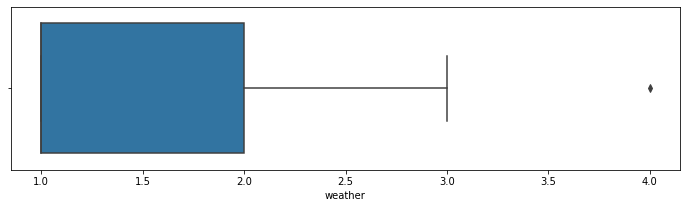

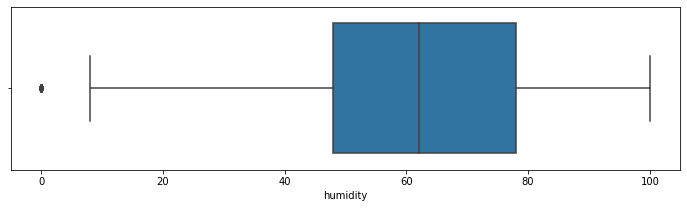

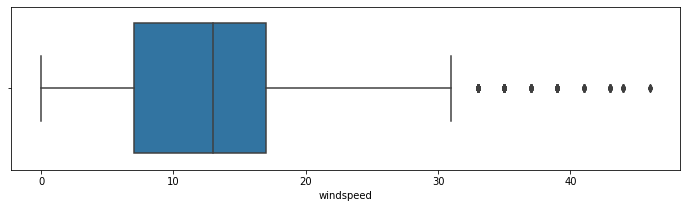

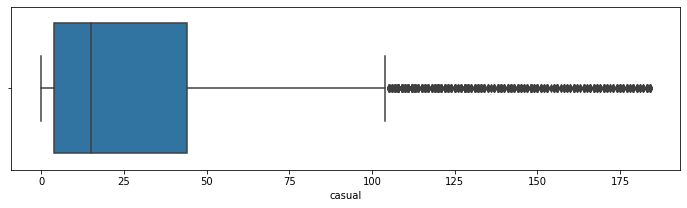

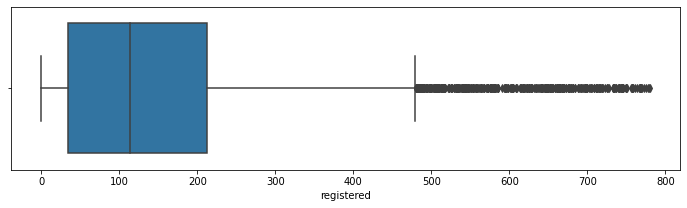

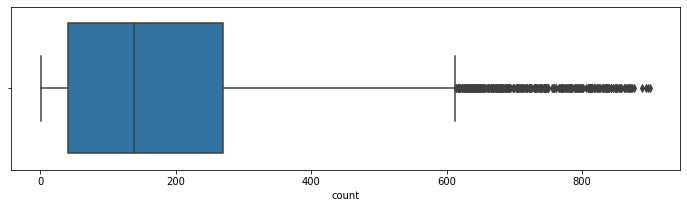

In [ ]:
for col in outlier_col:
  plt.figure(figsize=(12,3))
  sns.boxplot(x=col, data=train)
  plt.tight_layout
  plt.show()

weather에서 겨울의 값을 날릴 수는 없음. 약간이라도 drop을 했지만, 그래도 여전히 많은 이상치

그리고 처리하고 나니까, 휴일에서 0만 남음->상관점수 때에도 생각했지만 휴일이란 columns이 필요없을 것 같음

In [ ]:
train.drop('holiday', axis=1, inplace=True)

In [ ]:
train.reset_index(drop=True, inplace=True)

#### replace(IQR)

In [ ]:
def OL_both(outlier_col, w=1.5):
  OL_IDX = []

  for col in outlier_col:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    OL_lst = train[(train[col]<Q1-(IQR*w))|(train[col]>Q3+(IQR*w))].index
    OL_IDX.extend(OL_lst)
  OL_IDX = list(set(OL_IDX))
  return OL_IDX

def OL_below(outlier_col, w=1.5):
  OL_IDX = []

  for col in outlier_col:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    OL_lst = train[train[col]<Q1-(IQR*w)].index
    OL_IDX.extend(OL_lst)
  OL_IDX = list(set(OL_IDX))
  return OL_IDX

def OL_above(outlier_col, w=1.5):
  OL_IDX = []

  for col in outlier_col:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    OL_lst = train[train[col]>Q3+(IQR*w)].index
    OL_IDX.extend(OL_lst)
  OL_IDX = list(set(OL_IDX))
  return OL_IDX

In [ ]:
outlier_col.pop(0)  #0밖에 안 남아서 drop, 이상치 열에서도 제거

'holiday'

In [ ]:
outlier_col.pop(0)  #더이상 계절 변수를 손 볼 수 없어서 열에서 제거

'weather'

In [ ]:
len(OL_above(outlier_col))

1154

In [ ]:
len(OL_above(outlier_col, 2))

664

In [ ]:
len(OL_above(outlier_col, 3))

123

In [ ]:
OL_IDX2 = []

for col in outlier_col:
  Q1 = train[col].quantile(0.25)
  Q3 = train[col].quantile(0.75)
  IQR = Q3-Q1
  OL_lst = train[train[col]>Q3+(IQR*2)].index
  OL_IDX.extend(OL_lst)

OL_IDX2 = list(set(OL_IDX))

In [ ]:
outlier_col2 = [num for num, col in enumerate(train.columns) if col in outlier_col]

for col1, col2 in zip(outlier_col, outlier_col2):
  Q3 = train[col1].quantile(0.75)
  for idx in OL_IDX2:
    if train.iloc[idx, col2]==Q3:
      pass
    else:
      train[col1] = train[col1].replace(train.iloc[idx, col2], Q3)

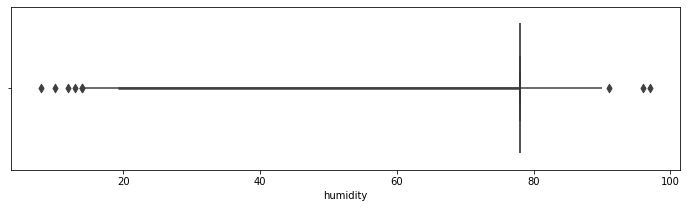

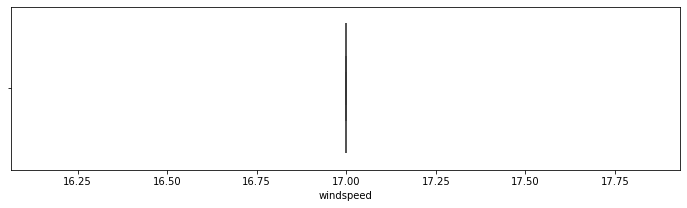

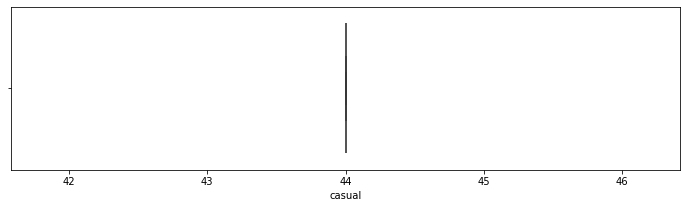

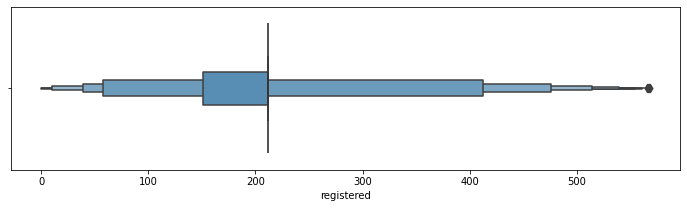

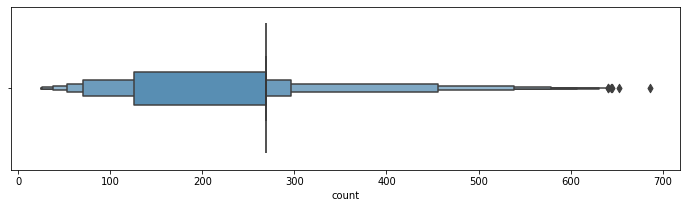

In [ ]:
for col in outlier_col:
  plt.figure(figsize=(12,3))
  sns.boxenplot(x=col, data=train)
  plt.tight_layout
  plt.show()

이상치는 어느 정도 정리가 된 거 같이 보임

## Q5. 모델을 적용하고 가설을 검증하시오.

In [ ]:
xtrn_col = [col for col in train.columns[1:8]]
xtrn_col.append('Hour')
xtst_col = [col for col in test.columns[1:9] if col!='holiday']
xtst_col.append('Hour')

X_trn = train.loc[:, xtrn_col]
X_tst = test.loc[:, xtst_col]
y_trn = train.loc[:, 'count']
y_tst = test.loc[:, 'count']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_trn, y_trn, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((8212, 8), (8212,))

In [ ]:
# 강사님방법
# from sklearn.metrics import make_scorer

# def rmsle(predicted_values, actual_values):
#     # 넘파이로 배열 형태로 바꿔준다.
#     predicted_values = np.array(predicted_values)
#     actual_values = np.array(actual_values)
    
#     # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
#     log_predict = np.log(predicted_values + 1)
#     log_actual = np.log(actual_values + 1)
    
#     # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
#     difference = log_predict - log_actual
#     # difference = (log_predict - log_actual) ** 2
#     difference = np.square(difference)
    
#     # 평균을 낸다.
#     mean_difference = difference.mean()
    
#     # 다시 루트를 씌운다.
#     score = np.sqrt(mean_difference)
    
#     return score

# rmsle_scorer = make_scorer(rmsle)
# rmsle_scorer

make_scorer(rmsle)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

lig_reg = LinearRegression()
lig_reg.fit(X_train,y_train)


score = cross_val_score(lig_reg, X_train, y_train, 
                        cv = k_fold, 
                        scoring = rmsle_scorer)

score.mean()

print(score)

[0.374787   0.37750388 0.42917965 0.38518593 0.3727311  0.34264196
 0.33931263 0.4000457  0.3778265  0.35249864]


전반적인 수치가 낮으니까 사용해도 될 것 같음

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

def BASIC_SCORE_REG(y_true, y_pred):
  R2 = r2_score(y_true, y_pred)
  print(f"R-squared : {R2}")
  MSE = mean_squared_error(y_true, y_pred)
  print(f"MSE : {MSE}")
  EVS = explained_variance_score(y_true, y_pred)
  print(f"Explained_Variance : {R2}")


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def BASIC_SCORE_CLS(y_true, y_pred):
  ACC = accuracy_score(y_true, y_pred)
  print(f"Accuracy : {ACC}")
  REC = recall_score(y_true, y_pred)
  print(f"Recall : {REC}")
  F1 = f1_score(y_true, y_pred)
  print(f"F1-score : {F1}")
  PS = precision_score(y_true, y_pred)
  print(f"Precision : {PS}")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

def RMSE_RMSLE(y_true, y_pred):
  RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
  print(f"RMSE : {RMSE}")
  RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
  print(f"RMSLE : {RMSLE}")

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor


lreg = LinearRegression()
lreg.fit(X_train, y_train)

lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgbrf = XGBRFRegressor()
xgbrf.fit(X_train, y_train)

[13:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

print('LinearRegression')
RMSE_RMSLE(y_val, lreg.predict(X_val))

print('LogisticRegression')
RMSE_RMSLE(y_val, lgreg.predict(X_val))

print('RandomForestRegressor')
RMSE_RMSLE(y_val, rfr.predict(X_val))

print('XGBRegressor')
RMSE_RMSLE(y_val, xgb.predict(X_val))

print('XGBRFRegressor')
RMSE_RMSLE(y_val, xgbrf.predict(X_val))

LinearRegression
RMSE : 64.54201293099543
RMSLE : 0.3947086723361136
LogisticRegression
RMSE : 66.55708155203916
RMSLE : 0.40691692422803777
RandomForestRegressor
RMSE : 70.19584749390195
RMSLE : 0.4059247032270755
XGBRegressor
RMSE : 62.60262570533544
RMSLE : 0.3870748570697656
XGBRFRegressor
RMSE : 63.88380947861221
RMSLE : 0.3935408379785552


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('LinearRegression')
BASIC_SCORE_REG(y_val, lreg.predict(X_val))

print('LogisticRegression')
BASIC_SCORE_REG(y_val, lgreg.predict(X_val))

print('RandomForestRegressor')
BASIC_SCORE_REG(y_val, rfr.predict(X_val))

print('XGBRegressor')
BASIC_SCORE_REG(y_val, xgb.predict(X_val))

print('XGBRFRegressor')
BASIC_SCORE_REG(y_val, xgbrf.predict(X_val))

LinearRegression
R-squared : 0.022998949508218125
MSE : 4165.671433184782
Explained_Variance : 0.022998949508218125
LogisticRegression
R-squared : -0.03895935871330636
MSE : 4429.845104724793
Explained_Variance : -0.03895935871330636
RandomForestRegressor
R-squared : -0.1556673990573898
MSE : 4927.45700538714
Explained_Variance : -0.1556673990573898
XGBRegressor
R-squared : 0.0808315340161524
MSE : 3919.0887452023258
Explained_Variance : 0.0808315340161524
XGBRFRegressor
R-squared : 0.04282437560229346
MSE : 4081.1411134996233
Explained_Variance : 0.04282437560229346


RMSE와 RMSLE로 보는 것이 더 이해하기 쉬움

하이퍼 파라미터를 조정하면 개선의 여지가 보임

# 빅데이터 플랫폼 아키텍쳐 설계

-- dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud



In [ ]:
import os
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

from os.path import join
MY_GOOGLE_DRIVE_PATH = "MyDrive/Task/"

KAGGLE = ".kaggle"
KAGGLE_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, KAGGLE)
os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_PATH
!pip install --upgrade --force-reinstall --no-deps kaggle
# %cd "{KAGGLE_PATH}"

PROJECT = "CreditCardFraud"
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, PROJECT)
# !mkdir "{PROJECT_PATH}"
%cd "{PROJECT_PATH}"

# !kaggle datasets list -s creditcardfraud
# !kaggle datasets download -d mlg-ulb/creditcardfraud
# !unzip creditcardfraud.zip
# !rm creditcardfraud.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
/content/drive/.shortcut-targets-by-id/1srYR8TqwFsUSR4BYzQtIBmWUKrEBjd44/Task/CreditCardFraud


In [ ]:
!ls

creditcard.csv


In [ ]:
import time
import random
import re
import math
import itertools

import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as dp
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(f"{PROJECT_PATH}/creditcard.csv", encoding="UTF-8")

In [ ]:
print('사기 아님', round(df['Class'].value_counts()[0]/len(df)*100,2),'%')
print('사기', round(df['Class'].value_counts()[1]/len(df)*100,2),'%')

사기 아님 99.83 %
사기 0.17 %


## Q1. 데이터의 분포를 확인하고 결론을 도출하시오.

Text(0.5, 1.0, '0 : No Fraud, 1: Fraud')

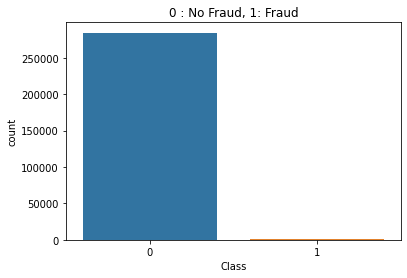

In [ ]:
sns.countplot(df['Class'])
plt.title('0 : No Fraud, 1: Fraud')

사기가 아닌 값이 사기인 값에 비해, 월등히 높은 수치를 가지고 있음. 솔직히 이렇게 심각한 사기 유무로 훈련이 될 까 고민되었던 이유는 0을 1과 같이 줄이면, 언더 샘플링일 것 같고 1을 0만큼 늘리면 오버 샘플링이 될 것 같아서 아직은 추가로 봐야할 것들이 많음.

또한, 위의 경우에 acc로 평가를 구하면 결과가 완전 난장난다고 했음

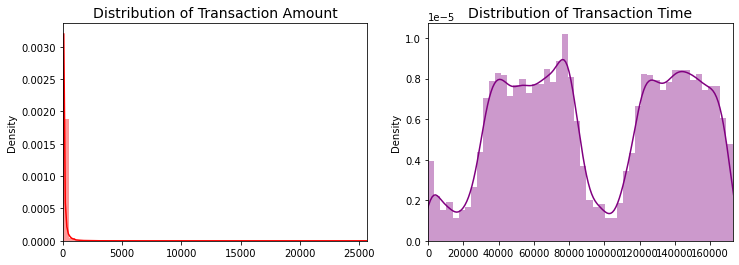

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='purple')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cls_0 = df.loc[df['Class'] == 0]["Time"]
cls_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [cls_0, cls_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

## Q2. 현재 데이터에 필요한 방법을 논의하고 코드를 검증을 하시오.

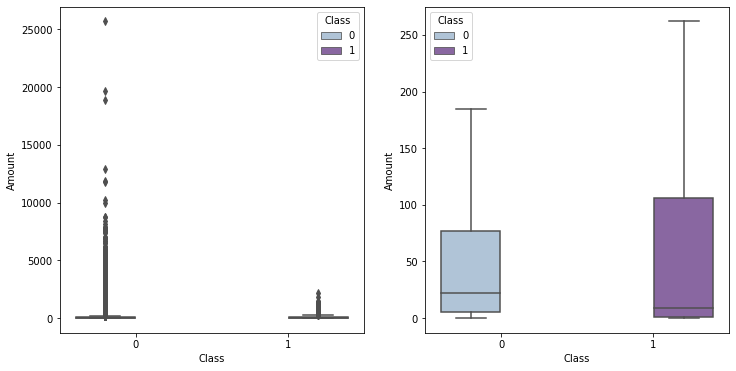

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax[0], x="Class", y="Amount", hue="Class",data=df, palette="BuPu",showfliers=True)
s = sns.boxplot(ax = ax[1], x="Class", y="Amount", hue="Class",data=df, palette="BuPu",showfliers=False)
plt.show()
#showfliers : Show the outliers beyond the caps.(default:True)

In [ ]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(color='rgb(238,23,11)',
                 line=dict(color='palegreen', width=1),
                 opacity=0.5),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

시간축과 함께 봐도, 타겟축과 함께 봐도 이상치가 존재하는 것처럼 나옴


* StandardScaler : 기본 스케일. 평균과 표준편차 사용
* MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
* MaxAbsScaler : 최대절대값과 0이 각각 1, 0이 되도록 스케일링
* RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화


앞에서 아예 전처리를 하지 않았기 때문에, RobustScaler도 괜찮을 것 같음

RobustScaler가 나은지, SMOTE가 나은지 조금 더 고민을 해야 함

## Q3. 위의 문제에서 제시한 방법을 적용한 다음에 모델로 검증을 하시오.

In [ ]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
rob_df = df.copy()

rob_df['scaled_amount'] = rob_scaler.fit_transform(rob_df['Amount'].values.reshape(-1,1))
rob_df['scaled_time'] = rob_scaler.fit_transform(rob_df['Time'].values.reshape(-1,1))

rob_df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
rob_df.corr()['Class':]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
Class,-0.101347,0.091289,-0.192961,0.133447,-0.094974,-0.043643,-0.187257,0.019875,-0.097733,-0.216883,0.154876,-0.260593,-0.004570,-0.302544,-0.004223,-0.196539,-0.326481,-0.111485,0.034783,0.020090,0.040413,0.000805,-0.002685,-0.007221,0.003308,0.004455,0.017580,0.009536,1.000000,0.005632,-0.012323
scaled_amount,-0.227709,-0.531409,-0.210880,0.098732,-0.386356,0.215981,0.397311,-0.103079,-0.044246,-0.101502,0.000104,-0.009542,0.005293,0.033751,-0.002986,-0.003910,0.007309,0.035650,-0.056151,0.339403,0.105999,-0.064801,-0.112633,0.005146,-0.047837,-0.003208,0.028825,0.010258,0.005632,1.000000,-0.010596
scaled_time,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.012323,-0.010596,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

X = rob_df.drop('Class', axis=1)
y = rob_df['Class']

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

clf = {"SGDClassifier" : SGDClassifier(),
      # "LinearSVC" : LinearSVC(),
      "LogisiticRegression" : LogisticRegression(),
      "Random Forest" : RandomForestClassifier(),
      "Ada Boost" : AdaBoostClassifier(),
      "Xgboost" : XGBClassifier(),
      'lightgbm' : LGBMClassifier(),
      # 'catboost' : CatBoostClassifier()}

for model_name, model_function in clf.items():
    model_function.fit(X_trn, y_trn)
    trn_score = cross_val_score(model_function, X_trn, y_trn, cv=5)
    try:
      print(f"{model_name}'s training score : {round(trn_score.mean(), 2) * 100}")
    except:
      pass

SGDClassifier's training score : 100.0
LogisiticRegression's training score : 100.0


KeyboardInterrupt: ignored

In [ ]:
print(X_trn.shape)
print(X_tst.shape)
print(y_trn.shape)
print(y_tst.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


정확도가 100이 나온다는 게 말이 안됨..아니 예상했지만, 그래도 말이 안됨

단순히 train_test_split을 사용해선 안된다고 판단->StratifiedKFold로 folding한 뒤 재 확인 필요

## Q4. 모델로 나온 결과를 해석하고 결론을 도출하시오.

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = rob_df.drop('Class', axis=1)
y = rob_df['Class']

SKFold = StratifiedKFold(n_splits=5, random_state=42, shuffle= False)

for trn_idx, tst_idx in SKFold.split(X, y):
    print("Train:", trn_idx, "Test:", tst_idx)
    org_Xtrn, org_Xtst = X.iloc[trn_idx], X.iloc[tst_idx]
    org_ytrn, org_ytst = y.iloc[trn_idx], y.iloc[tst_idx]

org_Xtrn = org_Xtrn.values
org_Xtst = org_Xtst.values
org_ytrn = org_ytrn.values
org_ytst = org_ytst.values

# See if both the train and test label distribution are similarly distributed
trn_unq_lbls, trn_cnt_lbls = np.unique(org_ytrn, return_counts=True)
tst_unq_lbls, tst_cnt_lbls = np.unique(org_ytst, return_counts=True)
print('-' * 100)

print('Distributions: \n')
print(trn_unq_lbls/ len(org_ytrn))
print(tst_unq_lbls/ len(org_ytst))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Distributions: 

[0.00000000e+00 4.38892936e-06]
[0.00000000e+00 1.75558716e-05]


In [ ]:
print(org_Xtrn.shape)
print(org_Xtst.shape)
print(org_ytrn.shape)
print(org_ytst.shape)

(227846, 30)
(56961, 30)
(227846,)
(56961,)


In [ ]:
clf = {"SGDClassifier" : SGDClassifier(),
      "LogisiticRegression" : LogisticRegression(),
      "Random Forest" : RandomForestClassifier(),
      "Ada Boost" : AdaBoostClassifier(),
      "Xgboost" : XGBClassifier(),
      'lightgbm' : LGBMClassifier()}

for model_name, model_function in clf.items():
    model_function.fit(org_Xtrn, org_ytrn)
    trn_score = cross_val_score(model_function, org_Xtrn, org_ytrn, cv=5)
    try:
      print(f"{model_name}'s training accuracy score : {round(trn_score.mean(), 2) * 100}")
    except:
      pass

SGDClassifier's training accuracy score : 100.0
LogisiticRegression's training accuracy score : 100.0


KeyboardInterrupt: ignored

StratifiedKFold로 train과 test를 나눠도 말도 안되는 accuracy 결과를 보고 평가지표는 다른 것을 사용할테지만 추가 작업이 필요함을 느낌

## Q5. 기존 모델에서 최적화를 하여 더 좋은 결과를 얻어내는 과정을 서술하시오.(코드로)

In [ ]:
rob_df[rob_df['Class']==1].count()

V1               492
V2               492
V3               492
V4               492
V5               492
V6               492
V7               492
V8               492
V9               492
V10              492
V11              492
V12              492
V13              492
V14              492
V15              492
V16              492
V17              492
V18              492
V19              492
V20              492
V21              492
V22              492
V23              492
V24              492
V25              492
V26              492
V27              492
V28              492
Class            492
scaled_amount    492
scaled_time      492
dtype: int64

In [ ]:
rob_df = rob_df.sample(frac=1)

# undersampling(1과 동일하게 행을 부여함)
fraud_df = rob_df.loc[df['Class'] == 1]
Nfraud_df = rob_df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, Nfraud_df])

normD_df = normal_distributed_df.sample(frac=1, random_state=42)

normD_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
283180,1.758698,0.200677,-0.756861,3.593869,0.628370,0.683699,0.129585,0.067849,-0.757385,1.335959,-1.818835,-0.410027,0.068727,0.133922,-0.562992,1.316006,-1.102940,-0.577635,-1.041180,-0.033839,-0.489651,-1.731945,0.412108,-0.098161,-0.539105,-0.629141,-0.043688,-0.012978,0,1.225739,1.018950
153823,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,-18.913243,4.971249,-12.686308,-1.071443,-7.383370,-2.992430,-8.582309,-13.806568,-6.000359,1.422632,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1,-0.275554,0.182462
70872,-0.416456,1.115018,0.918477,0.207292,-0.479925,-1.144005,0.558888,0.162878,-0.803630,-0.674154,-0.071703,0.937858,1.355972,0.281952,0.518560,0.139107,-0.198108,-0.563067,-0.190467,-0.045433,-0.007610,-0.181193,0.222494,0.733332,-0.461492,0.030748,-0.110405,-0.016372,0,0.251520,-0.359896
219892,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,-0.045125,0.195839,-0.629086,0.681222,-4.715521,-0.287876,0.497434,3.871618,1.492394,0.506040,0.205691,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,1,-0.296793,0.672388
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,2.450752,-5.694074,-1.155469,-7.132151,-0.059628,-4.596577,-5.522088,-3.529066,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,1,9.863900,0.637343


In [ ]:
from sklearn.model_selection import StratifiedKFold

X = normD_df.drop('Class', axis=1)
y = normD_df['Class']

SKFold = StratifiedKFold(n_splits=5, random_state=42, shuffle= False)

for trn_idx, tst_idx in SKFold.split(X, y):
    print("Train:", trn_idx, "Test:", tst_idx)
    org_Xtrn, org_Xtst = X.iloc[trn_idx], X.iloc[tst_idx]
    org_ytrn, org_ytst = y.iloc[trn_idx], y.iloc[tst_idx]

clf = {#"SGDClassifier" : SGDClassifier(),
      #"LogisiticRegression" : LogisticRegression(),
      "Random Forest" : RandomForestClassifier(),
      "Ada Boost" : AdaBoostClassifier(),
      "Xgboost" : XGBClassifier(),
      'lightgbm' : LGBMClassifier()}

for model_name, model_function in clf.items():
    model_function.fit(org_Xtrn, org_ytrn)
    trn_score = cross_val_score(model_function, org_Xtrn, org_ytrn, cv=5)
    try:
      print(f"{model_name}'s training accuracy score : {round(trn_score.mean(), 2) * 100}")
    except:
      pass

Train: [195 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430
 431 432 433 434 435 436 437 438 439 440 441

이해가 가는 범위의 수치가 나온 것은 Undersampling으로 정규화과정을 거친 데이터임

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

def BASIC_SCORE_REG(y_true, y_pred):
  R2 = r2_score(y_true, y_pred)
  print(f"R-squared : {R2}")
  MSE = mean_squared_error(y_true, y_pred)
  print(f"MSE : {MSE}")
  EVS = explained_variance_score(y_true, y_pred)
  print(f"Explained_Variance : {R2}")


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def BASIC_SCORE_CLS(y_true, y_pred):
  ACC = accuracy_score(y_true, y_pred)
  print(f"Accuracy : {ACC}")
  REC = recall_score(y_true, y_pred)
  print(f"Recall : {REC}")
  F1 = f1_score(y_true, y_pred)
  print(f"F1-score : {F1}")
  PS = precision_score(y_true, y_pred)
  print(f"Precision : {PS}")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

def RMSE_RMSLE(y_true, y_pred):
  RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
  print(f"RMSE : {RMSE}")
  RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
  print(f"RMSLE : {RMSLE}")

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(org_Xtrn, org_ytrn)
ypred_rfc = rfc.predict(org_Xtst)

lgbm = LGBMClassifier()
lgbm.fit(org_Xtrn, org_ytrn)
ypred_lgbm = lgbm.predict(org_Xtst)

In [ ]:
print('RandomForest')
BASIC_SCORE_CLS(org_ytst, ypred_rfc)
print('LightGBM')
BASIC_SCORE_CLS(org_ytst, ypred_lgbm)

RandomForest
Accuracy : 0.923469387755102
Recall : 0.8877551020408163
F1-score : 0.9206349206349207
Precision : 0.9560439560439561
LightGBM
Accuracy : 0.9336734693877551
Recall : 0.9081632653061225
F1-score : 0.9319371727748691
Precision : 0.956989247311828


In [ ]:
# oversampleing -> SMOTE
# 검증
# acc/precision/recall
# penalty term
# 시험 종료 이후에 더 자세히 알아보겠습니다

# 빅데이터 환경 분석

-- dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
import time
import random
import re
import math
import itertools

import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as dp
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(f"{PROJECT_PATH}/creditcard.csv", encoding="UTF-8")

## Q1. Dimensionality Reduction 방법을 사용하여서 결론을 도출하시오.

* TSNE

  It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

[TSNE 공식 문서] https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
# from sklearn.manifold import TSNE #3dim
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

X = df.drop('Class', axis=1)
y = df['Class']

#TSNE
# X_reduced_tsne = TSNE(n_components = 2, random_state=42).fit_transform(X.values)

#PCA
X_reduced_pca = PCA(n_components = 2, random_state=42).fit_transform(X.values)

#Truncated SVD
X_reduced_svd = TruncatedSVD(n_components = 2, random_state=42).fit_transform(X.values)

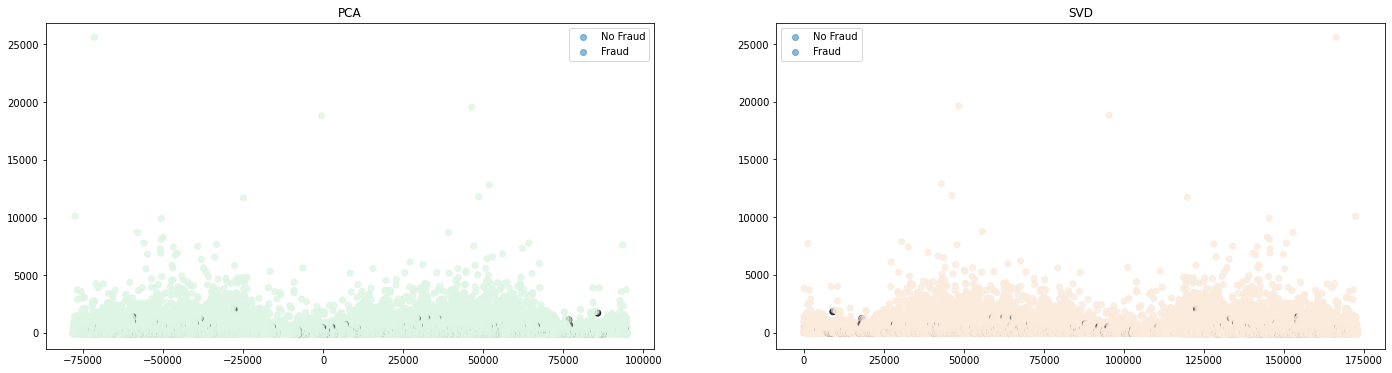

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,6))

ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), 
            cmap='mako', label='No Fraud', alpha=0.5)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), 
            cmap='mako', label='Fraud', alpha=0.5)
ax1.set_title('PCA')
ax1.legend()

ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:, 1], 
            c=(y==0), cmap='rocket', label='No Fraud', alpha=0.5)
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:, 1], 
            c=(y==0), cmap='rocket', label='Fraud', alpha=0.5)
ax2.set_title('SVD')
ax2.legend()

In [ ]:
X_reduced_pca

array([[ 9.48138629e+04,  5.59794671e+01],
       [ 9.48138546e+04, -9.09536597e+01],
       [ 9.48128757e+04,  2.85024840e+02],
       ...,
       [-7.79741415e+04, -1.61186800e+01],
       [-7.79741447e+04, -7.39987151e+01],
       [-7.79781331e+04,  1.33004366e+02]])

In [ ]:
X_reduced_pca.shape

(284807, 2)

In [ ]:
X_reduced_svd

array([[ 1.09775091e-01,  1.49620982e+02],
       [ 1.97215883e-03,  2.68681772e+00],
       [ 1.27783516e+00,  3.78665366e+02],
       ...,
       [ 1.72788003e+05, -5.89063018e+01],
       [ 1.72787961e+05, -1.16784460e+02],
       [ 1.72792113e+05,  9.02149538e+01]])

In [ ]:
X_reduced_svd.shape

(284807, 2)

차원 축소 후 값은 분명 다르지만, 분포의 양상은 비슷함

## Q2. 딥러닝 모델을 사용하여서 검증하시오.

In [ ]:
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def DL_unqNum_Dense(origin_shape, times, rep_act, rep_num=8, cls_num=2, fin_act='sigmoid'):
  model = Sequential()

  for adds in range(times):
    if adds==0:
      model.add(Dense(rep_num, activation=rep_act, input_shape=origin_shape))
    elif (adds+1)<times:
      rep_num = rep_num//2
      model.add(Dense(rep_num, activation=rep_act))
    elif (adds+1)==times:
      model.add(Dense(cls_num, activation=fin_act))
  return model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

pca_shape = (X_reduced_pca.shape[1], )

Dense_model_pca = DL_unqNum_Dense(pca_shape, 3, 'relu', 32, 2, 'sigmoid')
Dense_model_pca.summary()

Dense_model_pca.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

Dense_model_pca.fit(X_reduced_pca, y, epochs=50, batch_size=X_reduced_pca.shape[1], validation_split=0.2, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
113923/113923 [==============================] - 170s 1ms/step - loss: 0.8050 - acc: 0.9978 - val_loss: 0.0104 - val_acc: 0.9987
Epoch 2/50
113923/113923 [==============================] - 170s 1ms/step - loss: 0.0606 - acc: 0.9981 - val_loss: 0.0100 - val_acc: 0.9987
Epoch 3/50
113923/113923 [==============================] - 173s 2ms/step - loss: 0.0807 - acc: 0.9982 - val

KeyboardInterrupt: ignored

데이터가 복잡하지 않아서 몇 번 돌리지 않아도, 좋은 결과가 나오는데 오버피팅이나 언더피팅의 경우도 무시할 수 없음

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
113923/113923 [==============================] - 165s 1ms/step - loss: 0.0151 - acc: 0.9981 - val_loss: 0.0123 - val_acc: 0.9987
Epoch 2/5
113923/113923 [==============================] - 164s 1ms/step - loss: 0.0144 - acc: 0.9982 - val_loss: 0.0120 - val_acc: 0.9987
Epoch 3/5
113923/113923 [==============================] - 166s 1ms/step - loss: 0.0142 - acc: 0.9982 - val_

<Figure size 1080x576 with 0 Axes>

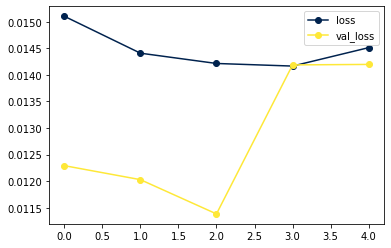

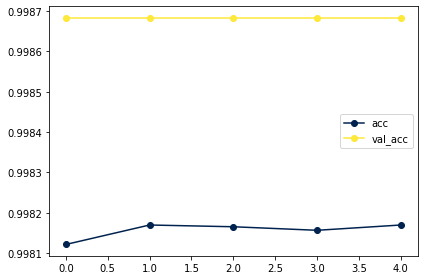

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scal_outlier_X_trn = scaler.fit_transform(X_reduced_pca)

# 우선 동일 조건에서 돌려봄
org_shape = (scal_outlier_X_trn.shape[1], )

Dense_model_pca2 = DL_unqNum_Dense(org_shape, 3, 'relu', 32, 2, 'sigmoid')
Dense_model_pca2.summary()

Dense_model_pca2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

Dense_model_pca2.fit(scal_outlier_X_trn, y, epochs=5, batch_size=scal_outlier_X_trn.shape[1], validation_split=0.2, verbose=1)

import matplotlib.pyplot as plt
# loss_acc 확인
lossacc2 = pd.DataFrame(Dense_model_pca2.history.history)

plt.figure(figsize=(15,8))
lossacc2[['loss', 'val_loss']].plot(marker="o", cmap="cividis")
lossacc2[['acc', 'val_acc']].plot(marker="o", cmap="cividis")
plt.tight_layout()
plt.show()

loss는 크게 흔들리고 acc는 큰 변동이 없다... 딥러닝보다 머신러닝으로 푸는 게 맞는 것 같다는 생각을 하게 되었음

In [ ]:
# svd_shape = (X_reduced_svd.shape[1], )

# Dense_model_svd = DL_unqNum_Dense(svd_shape, 3, 'relu', 32, 2, 'sigmoid')
# Dense_model_svd.summary()

# Dense_model_svd.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

# Dense_model_svd.fit(X_reduced_svd, y, epochs=50, batch_size=X_reduced_svd.shape[1], validation_split=0.2, verbose=1)

# 분포의 양상이 비슷해서 SVD는 시간 관계상 생략

## Q3. Confusion matrix 혹은 classification_report를 출력하고 결과를 도출하시오.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

In [ ]:
scal_outlier_X_trn

## Q4. ROC/AUC curve를 그리고 결과를 해석하시오.

In [ ]:
X_reduced_pca[12]

array([9.48038613e+04, 2.78602973e+01])

In [ ]:
SKFold = StratifiedKFold(n_splits=5, random_state=42, shuffle= False)

for trn_idx, tst_idx in SKFold.split(X_reduced_pca, y):
    print("Train:", trn_idx, "Test:", tst_idx)
    org_Xtrn2, org_Xtst2 = X_reduced_pca[trn_idx], X_reduced_pca[tst_idx]
    org_ytrn2, org_ytst2 = y.iloc[trn_idx], y.iloc[tst_idx]


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


차원 축소 전


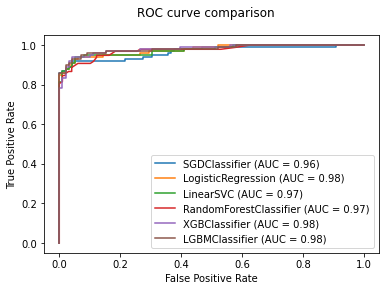

차원 축소 후


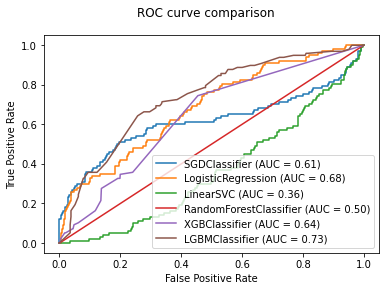

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

print("차원 축소 전")
sgd = SGDClassifier(random_state=42)
sgd.fit(org_Xtrn, org_ytrn)
lreg = LogisticRegression(random_state=42)
lreg.fit(org_Xtrn, org_ytrn)
lsvc = LinearSVC(random_state=42)
lsvc.fit(org_Xtrn, org_ytrn)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(org_Xtrn, org_ytrn)
xgb = XGBClassifier(random_state=42)
xgb.fit(org_Xtrn, org_ytrn)
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(org_Xtrn, org_ytrn)

sgd_disp = plot_roc_curve(sgd, org_Xtst, org_ytst)
lreg_disp = plot_roc_curve(lreg, org_Xtst, org_ytst, ax=sgd_disp.ax_)
lsvc_disp = plot_roc_curve(lsvc, org_Xtst, org_ytst, ax=sgd_disp.ax_)
rfc_disp = plot_roc_curve(rfc, org_Xtst, org_ytst, ax=sgd_disp.ax_)
xgb_disp = plot_roc_curve(xgb, org_Xtst, org_ytst, ax=sgd_disp.ax_)
lgbm_disp = plot_roc_curve(lgbm, org_Xtst, org_ytst, ax=sgd_disp.ax_)
lgbm_disp.figure_.suptitle("ROC curve comparison")

plt.tight_layout
plt.show()

print("차원 축소 후")
sgd2 = SGDClassifier(random_state=42)
sgd2.fit(org_Xtrn2, org_ytrn2)
lreg2 = LogisticRegression(random_state=42)
lreg2.fit(org_Xtrn2, org_ytrn2)
lsvc2 = LinearSVC(random_state=42)
lsvc2.fit(org_Xtrn2, org_ytrn2)
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(org_Xtrn2, org_ytrn2)
xgb2 = XGBClassifier(random_state=42)
xgb2.fit(org_Xtrn2, org_ytrn2)
lgbm2 = LGBMClassifier(random_state=42)
lgbm2.fit(org_Xtrn2, org_ytrn2)

sgd2_disp = plot_roc_curve(sgd2, org_Xtst2, org_ytst2)
lreg2_disp = plot_roc_curve(lreg2, org_Xtst2, org_ytst2, ax=sgd2_disp.ax_)
lsvc2_disp = plot_roc_curve(lsvc2, org_Xtst2, org_ytst2, ax=sgd2_disp.ax_)
rfc2_disp = plot_roc_curve(rfc2, org_Xtst2, org_ytst2, ax=sgd2_disp.ax_)
xgb2_disp = plot_roc_curve(xgb2, org_Xtst2, org_ytst2, ax=sgd2_disp.ax_)
lgbm2_disp = plot_roc_curve(lgbm2, org_Xtst2, org_ytst2, ax=sgd2_disp.ax_)
lgbm2_disp.figure_.suptitle("ROC curve comparison")

plt.tight_layout
plt.show()

차원 축소 전에도 ROC-AUC PLOT 예쁜데 굳이 축소를 해야하는가에 대한 의문이 들었음

## Q5. Hyper Parameter를 Bayesian Optimization을 사용해보시오.

[Bayesian Optimization 공식 문서] https://github.com/fmfn/BayesianOptimization

[BayesSearchCV 공식 문서] https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html

속도는 BayesSearchCV가 빠르지만, 최적화가 목적이라면 Optimization 추천!

[GridSearchCV 공식 문서] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

아 물론 속도가 제일 빠른 것은 GridSearchCV임

In [ ]:
df = pd.read_csv(f"{PROJECT_PATH}/creditcard.csv", encoding="UTF-8")
df.head()

In [ ]:
df = df.drop(['Time'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
bayesian_tr_idx, bayesian_val_idx = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Class'])

In [ ]:
bayesian_tr_idx = bayesian_tr_idx.index
bayesian_val_idx = bayesian_val_idx.index

In [ ]:
!pip install Bayesian-Optimization

In [ ]:
params = {
    'learning_rate':(0.001, 0.005),
    'max_depth':(-1,50)
}

In [ ]:
from bayes_opt import BayesianOptimization